In [1]:
cd '/home/dpirvu/axion'


/home/dpirvu/axion


In [2]:
import os,sys

print(sys.path)

#sys.path.remove('/home/dpirvu/DarkPhoton/hmvec-master')
sys.path.remove('/home/dpirvu/DarkPhotonxunWISE/hmvec-master')

sys.path.append('/home/dpirvu/axion/hmvec-master/')
sys.path.append('/home/dpirvu/python_stuff/')

print(sys.path)

%matplotlib inline

['/home/dpirvu', '/cm/shared/apps/python/python37/lib/python37.zip', '/cm/shared/apps/python/python37/lib/python3.7', '/cm/shared/apps/python/python37/lib/python3.7/lib-dynload', '', '/home/dpirvu/.local/lib/python3.7/site-packages', '/home/dpirvu/DarkPhotonxunWISE/hmvec-master', '/cm/shared/apps/python/python37/lib/python3.7/site-packages', '/cm/shared/apps/python/python37/lib/python3.7/site-packages/IPython/extensions', '/home/dpirvu/.ipython']
['/home/dpirvu', '/cm/shared/apps/python/python37/lib/python37.zip', '/cm/shared/apps/python/python37/lib/python3.7', '/cm/shared/apps/python/python37/lib/python3.7/lib-dynload', '', '/home/dpirvu/.local/lib/python3.7/site-packages', '/cm/shared/apps/python/python37/lib/python3.7/site-packages', '/cm/shared/apps/python/python37/lib/python3.7/site-packages/IPython/extensions', '/home/dpirvu/.ipython', '/home/dpirvu/axion/hmvec-master/', '/home/dpirvu/python_stuff/']


In [3]:
import hmvec as hm

from plotting import *
from compute_power_spectra import *
from params import *
import healpy as hp

from scipy.ndimage import gaussian_filter1d, gaussian_filter
from cycler import cycler, cycle
import warnings
from scipy.interpolate import interp2d, interp1d
from matplotlib.colors import LogNorm
from scipy.optimize import leastsq


np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)


In [4]:
def beautify(ax, ttl=None, bb=None):
    try:
        len(ax)
    except:
        ax = [ax]
    for ai, aa in enumerate(ax):
        aa.grid(which='both', ls=':', color='lightgray', alpha=0.7)
        aa.tick_params(direction='in', which='both', top=True, right=True)
        #aa.ticklabel_format(axis='both', style='scientific', scilimits=[0.,0.])
        aa.xaxis.set_label_coords(0.5, -0.15)
        aa.yaxis.set_label_coords(-0.15, 0.5)
        aa.xaxis.label.set_color('k')
        aa.yaxis.label.set_color('k')
        aa.tick_params(axis='x', colors='k')
        aa.tick_params(axis='y', colors='k')
        aa.tick_params(direction='in', which='both', bottom=None, left=None, top=None, right=None)
        aa.spines['left'].set_color('k')
        aa.spines['right'].set_color('k')
        aa.spines['top'].set_color('k')
        aa.spines['bottom'].set_color('k')
        aa.legend(title=ttl, bbox_to_anchor=bb, frameon=False, handlelength=1.5, labelspacing=0.3, columnspacing=0.6)
    return ax


In [5]:
path_dir = '/home/dpirvu/axion/data/foreground_models/'

In [6]:
map_path  = '/home/dpirvu/axion/data/maps/PR3/frequencyMaps/'
map_path1 = '/home/dpirvu/axion/data/PLA-CMBsubtracted/'
map_path0 = '/gpfs/dpirvu/Darkphoton_FG_estimate/'

In [7]:
allcols = cycle(allcolors)

In [8]:
compute_auto = False
compute_cross = False
visualize = False
compute_cib_from_websky = False

compute_corrcoeffs = False
compute_S4_corrcoeffs = False

compute_full_planck_fg = False
compute_full_s4_fg = False

compute_cross2d = False

compute_power_laws = False

In [9]:
tcmb=2.726e6
fsky=0.4

f_857 = 1./np.sqrt(5.19)
f_545 = 1./np.sqrt(3365)

arcmin2rad = lambda arcmin: arcmin * 0.000290888

In [10]:
Planck_freqs = np.array([30, 44, 70, 100, 143, 217, 353, 545, 857])
S4_freqs = np.array([20, 27, 39, 93, 145, 225, 278])


In [11]:
ellMax = 6144
ellTot = 9000


In [12]:
if True:
    cmb_autospectra = np.load(path_dir+'dimensionless_Planck_autospectra_CMB.npy')

    Planck_pspec_TT_fg = np.load(path_dir+'dimensionless_Planck_fg_auto_TT.npy')
    Planck_pspec_EE_fg = np.load(path_dir+'dimensionless_Planck_fg_auto_EE.npy')
    Planck_pspec_BB_fg = np.load(path_dir+'dimensionless_Planck_fg_auto_BB.npy')

    coeff_matrix_T = np.load(path_dir+'correlation_coeff_matrix_T.npy')
    coeff_matrix_E = np.load(path_dir+'correlation_coeff_matrix_E.npy')
    coeff_matrix_B = np.load(path_dir+'correlation_coeff_matrix_B.npy')

    S4_CIB_pspec = np.load(path_dir+'S4_CIB_spectra.npy')

    sm_coeff_matrix_T = np.load(path_dir+'smooth_correlation_coeff_matrix_T.npy')
    sm_coeff_matrix_E = np.load(path_dir+'smooth_correlation_coeff_matrix_E.npy')
    sm_coeff_matrix_B = np.load(path_dir+'smooth_correlation_coeff_matrix_B.npy')

    s4_coeff_matrix_T = np.load(path_dir+'s4_correlation_coeff_matrix_T.npy')
    s4_coeff_matrix_E = np.load(path_dir+'s4_correlation_coeff_matrix_E.npy')
    s4_coeff_matrix_B = np.load(path_dir+'s4_correlation_coeff_matrix_B.npy')

    fg_models_T = np.load(path_dir+'power_law_models_T.npy')
    fg_models_E = np.load(path_dir+'power_law_models_E.npy')
    fg_models_B = np.load(path_dir+'power_law_models_B.npy')
    
    Planck_pspec_TT_fg2d = np.load(path_dir+'dimensionless_Planck_fg_auto_TT_full2D.npy')
    Planck_pspec_EE_fg2d = np.load(path_dir+'dimensionless_Planck_fg_auto_EE_full2D.npy')
    Planck_pspec_BB_fg2d = np.load(path_dir+'dimensionless_Planck_fg_auto_BB_full2D.npy')

    full_Planck_TT = np.load(path_dir+'Planck_foregrounds_TT.npy')
    full_Planck_EE = np.load(path_dir+'Planck_foregrounds_EE.npy')
    full_Planck_BB = np.load(path_dir+'Planck_foregrounds_BB.npy')

    S4_fg_models_T = np.load(path_dir+'S4_power_law_foregrounds_T.npy')
    S4_fg_models_E = np.load(path_dir+'S4_power_law_foregrounds_E.npy')
    S4_fg_models_B = np.load(path_dir+'S4_power_law_foregrounds_B.npy')

    S4_pspec_TT_fg = np.load(path_dir+'S4_foregrounds_TT.npy')
    S4_pspec_EE_fg = np.load(path_dir+'S4_foregrounds_EE.npy')
    S4_pspec_BB_fg = np.load(path_dir+'S4_foregrounds_BB.npy')

    full_S4_TT = np.load(path_dir+'full_S4_foregrounds_TT.npy')
    full_S4_EE = np.load(path_dir+'full_S4_foregrounds_EE.npy')
    full_S4_BB = np.load(path_dir+'full_S4_foregrounds_BB.npy')


### Load Maps

In [13]:
if compute_cross or compute_auto or visualize:
    cmb_I = hp.read_map(map_path0 + "COM_CMB_IQU-smica_2048_R3.00_full.fits", field=0)
    cmb_Q = hp.read_map(map_path0 + "COM_CMB_IQU-smica_2048_R3.00_full.fits", field=1)
    cmb_U = hp.read_map(map_path0 + "COM_CMB_IQU-smica_2048_R3.00_full.fits", field=2)

    mask = hp.read_map(map_path0 + "HFI_Mask_GalPlane-apo2_2048_R2.00.fits", field=1)
    # field=1 corresponds to fksy=0.4

In [14]:
if compute_cross or compute_auto or visualize:
    I_857 = f_857 * hp.read_map(map_path + "HFI_SkyMap_857-field-Int_2048_R3.00_full.fits", field=0)
    I_545 = f_545 * hp.read_map(map_path + "HFI_SkyMap_545-field-Int_2048_R3.00_full.fits", field=0)
    I_353 = hp.read_map(map_path + "HFI_SkyMap_353-psb-field-IQU_2048_R3.00_full.fits", field=0)
    I_217 = hp.read_map(map_path + "HFI_SkyMap_217-field-IQU_2048_R3.00_full.fits", field=0)
    I_143 = hp.read_map(map_path + "HFI_SkyMap_143-field-IQU_2048_R3.00_full.fits", field=0)
    I_100 = hp.read_map(map_path + "HFI_SkyMap_100-field-IQU_2048_R3.00_full.fits", field=0)
    I_70  = hp.pixelfunc.ud_grade(hp.read_map(map_path + "LFI_SkyMap_070-BPassCorrected-field-IQU_1024_R3.00_full.fits", field=0),2048)
    I_44  = hp.pixelfunc.ud_grade(hp.read_map(map_path + "LFI_SkyMap_044-BPassCorrected-field-IQU_1024_R3.00_full.fits", field=0),2048)
    I_30  = hp.pixelfunc.ud_grade(hp.read_map(map_path + "LFI_SkyMap_030-BPassCorrected-field-IQU_1024_R3.00_full.fits", field=0),2048)

    #Q_857 = hp.read_map(map_path + "HFI_SkyMap_857-field-Int_2048_R3.00_full.fits", field=1)
    #Q_545 = hp.read_map(map_path + "HFI_SkyMap_545-field-Int_2048_R3.00_full.fits", field=1)
    Q_353 = hp.read_map(map_path + "HFI_SkyMap_353-psb-field-IQU_2048_R3.00_full.fits", field=1)
    Q_217 = hp.read_map(map_path + "HFI_SkyMap_217-field-IQU_2048_R3.00_full.fits", field=1)
    Q_143 = hp.read_map(map_path + "HFI_SkyMap_143-field-IQU_2048_R3.00_full.fits", field=1)
    Q_100 = hp.read_map(map_path + "HFI_SkyMap_100-field-IQU_2048_R3.00_full.fits", field=1)
    Q_70  = hp.pixelfunc.ud_grade(hp.read_map(map_path + "LFI_SkyMap_070-BPassCorrected-field-IQU_1024_R3.00_full.fits", field=1),2048)
    Q_44  = hp.pixelfunc.ud_grade(hp.read_map(map_path + "LFI_SkyMap_044-BPassCorrected-field-IQU_1024_R3.00_full.fits", field=1),2048)
    Q_30  = hp.pixelfunc.ud_grade(hp.read_map(map_path + "LFI_SkyMap_030-BPassCorrected-field-IQU_1024_R3.00_full.fits", field=1),2048)

    #U_857 = hp.read_map(map_path + "HFI_SkyMap_857-field-Int_2048_R3.00_full.fits", field=2)
    #U_545 = hp.read_map(map_path + "HFI_SkyMap_545-field-Int_2048_R3.00_full.fits", field=2)
    U_353 = hp.read_map(map_path + "HFI_SkyMap_353-psb-field-IQU_2048_R3.00_full.fits", field=2)
    U_217 = hp.read_map(map_path + "HFI_SkyMap_217-field-IQU_2048_R3.00_full.fits", field=2)
    U_143 = hp.read_map(map_path + "HFI_SkyMap_143-field-IQU_2048_R3.00_full.fits", field=2)
    U_100 = hp.read_map(map_path + "HFI_SkyMap_100-field-IQU_2048_R3.00_full.fits", field=2)
    U_70  = hp.pixelfunc.ud_grade(hp.read_map(map_path + "LFI_SkyMap_070-BPassCorrected-field-IQU_1024_R3.00_full.fits", field=2),2048)
    U_44  = hp.pixelfunc.ud_grade(hp.read_map(map_path + "LFI_SkyMap_044-BPassCorrected-field-IQU_1024_R3.00_full.fits", field=2),2048)
    U_30  = hp.pixelfunc.ud_grade(hp.read_map(map_path + "LFI_SkyMap_030-BPassCorrected-field-IQU_1024_R3.00_full.fits", field=2),2048)


### Subtract CMB and add (apodized) mask

In [15]:
if compute_cross or compute_auto or visualize:
    cmb_I = hp.ma(cmb_I)
    cmb_Q = hp.ma(cmb_Q)
    cmb_U = hp.ma(cmb_U)

    I_30  = hp.ma(I_30)
    I_44  = hp.ma(I_44)
    I_70  = hp.ma(I_70)
    I_100 = hp.ma(I_100)
    I_143 = hp.ma(I_143)
    I_217 = hp.ma(I_217)
    I_353 = hp.ma(I_353)
    I_545 = hp.ma(I_545)
    I_857 = hp.ma(I_857)

    Q_30  = hp.ma(Q_30)
    Q_44  = hp.ma(Q_44)
    Q_70  = hp.ma(Q_70)
    Q_100 = hp.ma(Q_100)
    Q_143 = hp.ma(Q_143)
    Q_217 = hp.ma(Q_217)
    Q_353 = hp.ma(Q_353)
    #Q_545 = hp.ma(Q_545)
    #Q_857 = hp.ma(Q_857)

    U_30  = hp.ma(U_30)
    U_44  = hp.ma(U_44)
    U_70  = hp.ma(U_70)
    U_100 = hp.ma(U_100)
    U_143 = hp.ma(U_143)
    U_217 = hp.ma(U_217)
    U_353 = hp.ma(U_353)
    #U_545 = hp.ma(U_545)
    #U_857 = hp.ma(U_857)

    masked_cmb_I = mask * cmb_I
    masked_cmb_Q = mask * cmb_Q
    masked_cmb_U = mask * cmb_U

    masked_fg_I_30  = mask * (I_30  - cmb_I)
    masked_fg_I_44  = mask * (I_44  - cmb_I)
    masked_fg_I_70  = mask * (I_70  - cmb_I)
    masked_fg_I_100 = mask * (I_100 - cmb_I)
    masked_fg_I_143 = mask * (I_143 - cmb_I)
    masked_fg_I_217 = mask * (I_217 - cmb_I)
    masked_fg_I_353 = mask * (I_353 - cmb_I)
    masked_fg_I_545 = mask * (I_545 - cmb_I)
    masked_fg_I_857 = mask * (I_857 - cmb_I)

    masked_fg_Q_30  = mask * (Q_30  - cmb_Q)
    masked_fg_Q_44  = mask * (Q_44  - cmb_Q)
    masked_fg_Q_70  = mask * (Q_70  - cmb_Q)
    masked_fg_Q_100 = mask * (Q_100 - cmb_Q)
    masked_fg_Q_143 = mask * (Q_143 - cmb_Q)
    masked_fg_Q_217 = mask * (Q_217 - cmb_Q)
    masked_fg_Q_353 = mask * (Q_353 - cmb_Q)
    #masked_fg_Q_545 = mask * (Q_545 - cmb_Q)
    #masked_fg_Q_857 = mask * (Q_857 - cmb_Q)

    masked_fg_U_30  = mask * (U_30  - cmb_U)
    masked_fg_U_44  = mask * (U_44  - cmb_U)
    masked_fg_U_70  = mask * (U_70  - cmb_U)
    masked_fg_U_100 = mask * (U_100 - cmb_U)
    masked_fg_U_143 = mask * (U_143 - cmb_U)
    masked_fg_U_217 = mask * (U_217 - cmb_U)
    masked_fg_U_353 = mask * (U_353 - cmb_U)
    #masked_fg_U_545 = mask * (U_545 - cmb_U)
    #masked_fg_U_857 = mask * (U_857 - cmb_U)


### See some maps

In [16]:
if visualize:
    hp.mollview(mask, norm='hist')


In [17]:
if visualize:
    hp.mollview(cmb_I, norm='hist')
    hp.mollview(masked_cmb_I, norm='hist')


In [18]:
if visualize:
    hp.mollview(cmb_Q, norm='hist')
    hp.mollview(masked_cmb_Q, norm='hist')


In [19]:
if visualize:
    hp.mollview(cmb_U, norm='hist')
    hp.mollview(masked_cmb_U, norm='hist')


In [20]:
if visualize:
    hp.mollview(I_100, norm='hist')
    hp.mollview(I_100-cmb_I, norm='hist')
    hp.mollview(mask*(I_100-cmb_I), norm='hist')
    hp.mollview(mask*I_100, norm='hist')


In [21]:
if visualize:
    hp.mollview(Q_100, norm='hist')
    hp.mollview(Q_100-cmb_Q, norm='hist')
    hp.mollview(masked_fg_Q_100, norm='hist')


In [22]:
if visualize:
    hp.mollview(U_100, norm='hist')
    hp.mollview(U_100-cmb_U, norm='hist')
    hp.mollview(masked_fg_U_100, norm='hist')


### Compute Auto Power Spectra

In [23]:
if compute_auto:
    cmb_autospectra = hp.anafast([masked_cmb_I, masked_cmb_Q, masked_cmb_U])

    # returns TT, EE, BB, TE, EB, TB
    autospectra_30  = hp.anafast([masked_fg_I_30, masked_fg_Q_30, masked_fg_U_30], nspec=3, pol=True)
    autospectra_44  = hp.anafast([masked_fg_I_44, masked_fg_Q_44, masked_fg_U_44], nspec=3, pol=True)
    autospectra_70  = hp.anafast([masked_fg_I_70, masked_fg_Q_70, masked_fg_U_70], nspec=3, pol=True)
    autospectra_100 = hp.anafast([masked_fg_I_100, masked_fg_Q_100, masked_fg_U_100], nspec=3, pol=True)
    autospectra_143 = hp.anafast([masked_fg_I_143, masked_fg_Q_143, masked_fg_U_143], nspec=3, pol=True)
    autospectra_217 = hp.anafast([masked_fg_I_217, masked_fg_Q_217, masked_fg_U_217], nspec=3, pol=True)
    autospectra_353 = hp.anafast([masked_fg_I_353, masked_fg_Q_353, masked_fg_U_353], nspec=3, pol=True)
    # returns TT
    autospectra_545 = hp.anafast(masked_fg_I_545)
    autospectra_857 = hp.anafast(masked_fg_I_857)

    Planck_pspec_TT_fg = np.zeros((ellMax, 9))
    Planck_pspec_TT_fg[:,0] = autospectra_30[0][:ellMax]
    Planck_pspec_TT_fg[:,1] = autospectra_44[0][:ellMax]
    Planck_pspec_TT_fg[:,2] = autospectra_70[0][:ellMax]
    Planck_pspec_TT_fg[:,3] = autospectra_100[0][:ellMax]
    Planck_pspec_TT_fg[:,4] = autospectra_143[0][:ellMax]
    Planck_pspec_TT_fg[:,5] = autospectra_217[0][:ellMax]
    Planck_pspec_TT_fg[:,6] = autospectra_353[0][:ellMax]
    Planck_pspec_TT_fg[:,7] = autospectra_545[:ellMax]
    Planck_pspec_TT_fg[:,8] = autospectra_857[:ellMax]

    Planck_pspec_EE_fg = np.zeros((ellMax, 7))
    Planck_pspec_EE_fg[:,0] = autospectra_30[1][:ellMax]
    Planck_pspec_EE_fg[:,1] = autospectra_44[1][:ellMax]
    Planck_pspec_EE_fg[:,2] = autospectra_70[1][:ellMax]
    Planck_pspec_EE_fg[:,3] = autospectra_100[1][:ellMax]
    Planck_pspec_EE_fg[:,4] = autospectra_143[1][:ellMax]
    Planck_pspec_EE_fg[:,5] = autospectra_217[1][:ellMax]
    Planck_pspec_EE_fg[:,6] = autospectra_353[1][:ellMax]

    Planck_pspec_BB_fg = np.zeros((ellMax, 7))
    Planck_pspec_BB_fg[:,0] = autospectra_30[2][:ellMax]
    Planck_pspec_BB_fg[:,1] = autospectra_44[2][:ellMax]
    Planck_pspec_BB_fg[:,2] = autospectra_70[2][:ellMax]
    Planck_pspec_BB_fg[:,3] = autospectra_100[2][:ellMax]
    Planck_pspec_BB_fg[:,4] = autospectra_143[2][:ellMax]
    Planck_pspec_BB_fg[:,5] = autospectra_217[2][:ellMax]
    Planck_pspec_BB_fg[:,6] = autospectra_353[2][:ellMax]

    np.save(path_dir+'dimensionless_Planck_autospectra_CMB.npy', cmb_autospectra)
    np.save(path_dir+'dimensionless_Planck_fg_auto_TT.npy', Planck_pspec_TT_fg)
    np.save(path_dir+'dimensionless_Planck_fg_auto_EE.npy', Planck_pspec_EE_fg)
    np.save(path_dir+'dimensionless_Planck_fg_auto_BB.npy', Planck_pspec_BB_fg)

### Compute Cross Power Spectra

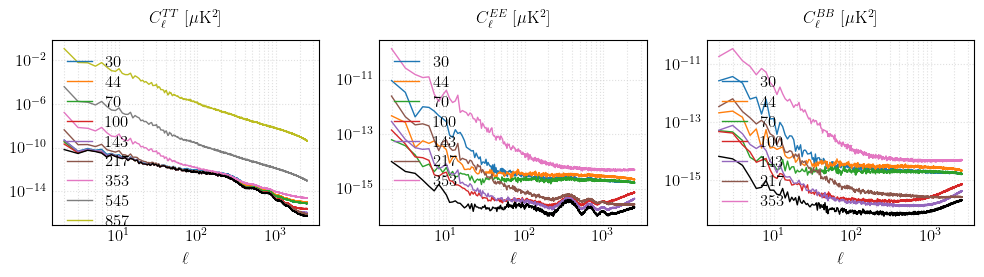

In [24]:
# I want to extrapolate the Planck foreground model up to ell 9000 so as to recycle it for S4.
allcols = np.array(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
colsdef = cycle(allcols)

ls = np.arange(2, 2500)

colsdef = cycle(allcols)
fig, ax = plt.subplots(1,3, figsize = (10,3.))
for fi in range(9):
    col = next(colsdef)

    psTT = Planck_pspec_TT_fg[ls,fi] + cmb_autospectra[0][ls]
    ax[0].plot(ls, psTT, color=col, label=r'${:.0f}$'.format(Planck_freqs[fi]), lw=1)

    if fi<7:
        psEE = Planck_pspec_EE_fg[ls,fi] + cmb_autospectra[1][ls]
        ax[1].plot(ls, psEE, color=col, label=r'${:.0f}$'.format(Planck_freqs[fi]), lw=1)

        psBB = Planck_pspec_BB_fg[ls,fi] + cmb_autospectra[2][ls]
        ax[2].plot(ls, psBB, color=col, label=r'${:.0f}$'.format(Planck_freqs[fi]), lw=1)

ax[0].plot(ls, cmb_autospectra[0][ls] , color='k', ls='-', lw=1)
ax[1].plot(ls, cmb_autospectra[1][ls], color='k', ls='-', lw=1)
ax[2].plot(ls, cmb_autospectra[2][ls], color='k', ls='-', lw=1)
[aa.set_yscale('log') for aa in ax]
[aa.set_xscale('log') for aa in ax]
#ax[0].set_ylim(1e-4, 1e14)
ax[0].set_title(r'$C_\ell^{TT} \; [{\rm \mu K^2}]$')
ax[1].set_title(r'$C_\ell^{EE} \; [{\rm \mu K^2}]$')
ax[2].set_title(r'$C_\ell^{BB} \; [{\rm \mu K^2}]$')
[aa.set_xlabel(r'$\ell$') for aa in ax]
#[aa.set_ylim(1e-5,1e13) for aa in ax]
beautify(ax)
plt.tight_layout()
plt.show()


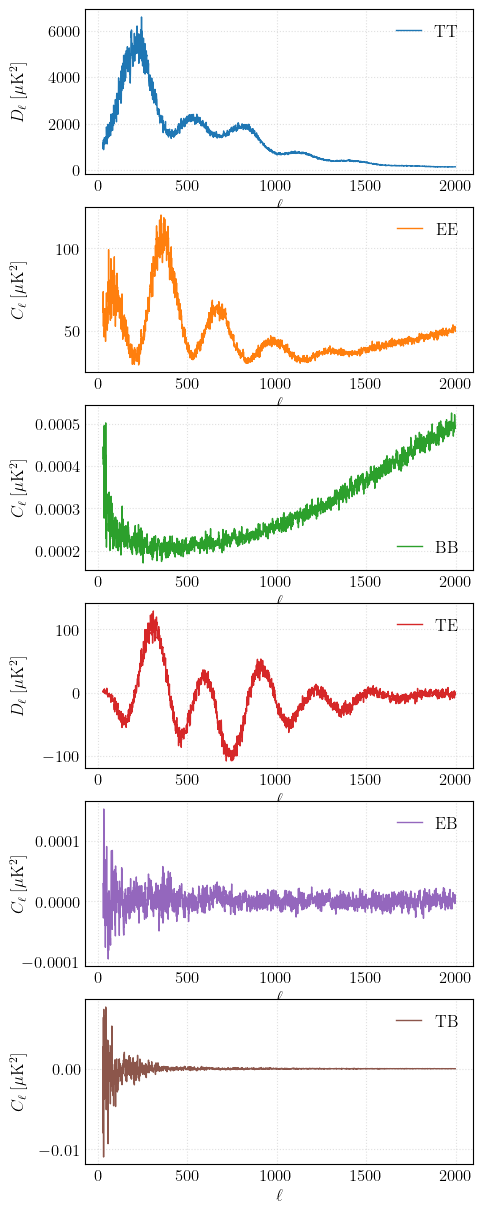

In [25]:
ls = np.arange(30, 2000)
dell = ls*(ls+1)/(2.*np.pi)
pref = tcmb**2. * fsky

fig, ax = plt.subplots(6,1, figsize = (5,15))
ax[0].plot(ls, pref * dell * cmb_autospectra[0][ls], color=allcols[0], lw=1, label=r'$\rm TT$')
ax[1].plot(ls, pref * cmb_autospectra[1][ls]/1e-5, color=allcols[1], lw=1, label=r'$\rm EE$')
ax[2].plot(ls, pref * cmb_autospectra[2][ls], color=allcols[2], lw=1, label=r'$\rm BB$')
ax[3].plot(ls, pref * dell * cmb_autospectra[3][ls], color=allcols[3], lw=1, label=r'$\rm TE$')
ax[4].plot(ls, pref * cmb_autospectra[4][ls], color=allcols[4], lw=1, label=r'$\rm EB$')
ax[5].plot(ls, pref * cmb_autospectra[5][ls], color=allcols[5], lw=1, label=r'$\rm TB$')

[aa.set_ylabel(r'$D_\ell \; [{\rm \mu K^2}]$') for aa in [ax[0],ax[3]]]
[aa.set_ylabel(r'$C_\ell \; [{\rm \mu K^2}]$') for aa in [ax[1],ax[2],ax[4],ax[5]]]
[aa.set_xlabel(r'$\ell$') for aa in ax]
beautify(ax)
plt.show()

### Compute cross-spectra and correlation coefficients

In [26]:
if compute_cross:
    pspec_fg_30  = np.array([Planck_pspec_TT_fg[:,0], Planck_pspec_EE_fg[:,0], Planck_pspec_BB_fg[:,0]])
    pspec_fg_44  = np.array([Planck_pspec_TT_fg[:,1], Planck_pspec_EE_fg[:,1], Planck_pspec_BB_fg[:,1]])
    pspec_fg_70  = np.array([Planck_pspec_TT_fg[:,2], Planck_pspec_EE_fg[:,2], Planck_pspec_BB_fg[:,2]])
    pspec_fg_100 = np.array([Planck_pspec_TT_fg[:,3], Planck_pspec_EE_fg[:,3], Planck_pspec_BB_fg[:,3]])
    pspec_fg_143 = np.array([Planck_pspec_TT_fg[:,4], Planck_pspec_EE_fg[:,4], Planck_pspec_BB_fg[:,4]])
    pspec_fg_217 = np.array([Planck_pspec_TT_fg[:,5], Planck_pspec_EE_fg[:,5], Planck_pspec_BB_fg[:,5]])
    pspec_fg_353 = np.array([Planck_pspec_TT_fg[:,6], Planck_pspec_EE_fg[:,6], Planck_pspec_BB_fg[:,6]])
    pspec_fg_545 = np.array([Planck_pspec_TT_fg[:,7]])
    pspec_fg_857 = np.array([Planck_pspec_TT_fg[:,8]])

    pspec_fg_30_44  = hp.anafast([masked_fg_I_30, masked_fg_Q_30, masked_fg_U_30], [masked_fg_I_44, masked_fg_Q_44, masked_fg_U_44], nspec=3, lmax=ellMax-1, pol=True)
    pspec_fg_30_70  = hp.anafast([masked_fg_I_30, masked_fg_Q_30, masked_fg_U_30], [masked_fg_I_70, masked_fg_Q_70, masked_fg_U_70], nspec=3, lmax=ellMax-1, pol=True)
    pspec_fg_30_100 = hp.anafast([masked_fg_I_30, masked_fg_Q_30, masked_fg_U_30], [masked_fg_I_100, masked_fg_Q_100, masked_fg_U_100], nspec=3, lmax=ellMax-1, pol=True)
    pspec_fg_30_143 = hp.anafast([masked_fg_I_30, masked_fg_Q_30, masked_fg_U_30], [masked_fg_I_143, masked_fg_Q_143, masked_fg_U_143], nspec=3, lmax=ellMax-1, pol=True)
    pspec_fg_30_217 = hp.anafast([masked_fg_I_30, masked_fg_Q_30, masked_fg_U_30], [masked_fg_I_217, masked_fg_Q_217, masked_fg_U_217], nspec=3, lmax=ellMax-1, pol=True)
    pspec_fg_30_353 = hp.anafast([masked_fg_I_30, masked_fg_Q_30, masked_fg_U_30], [masked_fg_I_353, masked_fg_Q_353, masked_fg_U_353], nspec=3, lmax=ellMax-1, pol=True)
    pspec_fg_30_545 = hp.anafast(masked_fg_I_30, masked_fg_I_545, lmax=ellMax-1)
    pspec_fg_30_857 = hp.anafast(masked_fg_I_30, masked_fg_I_857, lmax=ellMax-1)

    preq_dat = [pspec_fg_30_44, pspec_fg_30_70, pspec_fg_30_100, pspec_fg_30_143, pspec_fg_30_217, pspec_fg_30_353, pspec_fg_30_545, pspec_fg_30_857]
    np.save(path_dir + 'preq_dat_30.npy', preq_dat)

    pspec_fg_44_30  = np.copy(pspec_fg_30_44)
    pspec_fg_44_70  = hp.anafast([masked_fg_I_44, masked_fg_Q_44, masked_fg_U_44], [masked_fg_I_70, masked_fg_Q_70, masked_fg_U_70], nspec=3, lmax=ellMax-1, pol=True)
    pspec_fg_44_100 = hp.anafast([masked_fg_I_44, masked_fg_Q_44, masked_fg_U_44], [masked_fg_I_100, masked_fg_Q_100, masked_fg_U_100], nspec=3, lmax=ellMax-1, pol=True)
    pspec_fg_44_143 = hp.anafast([masked_fg_I_44, masked_fg_Q_44, masked_fg_U_44], [masked_fg_I_143, masked_fg_Q_143, masked_fg_U_143], nspec=3, lmax=ellMax-1, pol=True)
    pspec_fg_44_217 = hp.anafast([masked_fg_I_44, masked_fg_Q_44, masked_fg_U_44], [masked_fg_I_217, masked_fg_Q_217, masked_fg_U_217], nspec=3, lmax=ellMax-1, pol=True)
    pspec_fg_44_353 = hp.anafast([masked_fg_I_44, masked_fg_Q_44, masked_fg_U_44], [masked_fg_I_353, masked_fg_Q_353, masked_fg_U_353], nspec=3, lmax=ellMax-1, pol=True)
    pspec_fg_44_545 = hp.anafast(masked_fg_I_44, masked_fg_I_545, lmax=ellMax-1)
    pspec_fg_44_857 = hp.anafast(masked_fg_I_44, masked_fg_I_857, lmax=ellMax-1)

    preq_dat = [pspec_fg_44_30, pspec_fg_44_70, pspec_fg_44_100, pspec_fg_44_143, pspec_fg_44_217, pspec_fg_44_353, pspec_fg_44_545, pspec_fg_44_857]
    np.save(path_dir + 'preq_dat_44.npy', preq_dat)

    pspec_fg_70_30  = np.copy(pspec_fg_30_70)
    pspec_fg_70_44  = np.copy(pspec_fg_44_70)
    pspec_fg_70_100 = hp.anafast([masked_fg_I_70, masked_fg_Q_70, masked_fg_U_70], [masked_fg_I_100, masked_fg_Q_100, masked_fg_U_100], nspec=3, lmax=ellMax-1, pol=True)
    pspec_fg_70_143 = hp.anafast([masked_fg_I_70, masked_fg_Q_70, masked_fg_U_70], [masked_fg_I_143, masked_fg_Q_143, masked_fg_U_143], nspec=3, lmax=ellMax-1, pol=True)
    pspec_fg_70_217 = hp.anafast([masked_fg_I_70, masked_fg_Q_70, masked_fg_U_70], [masked_fg_I_217, masked_fg_Q_217, masked_fg_U_217], nspec=3, lmax=ellMax-1, pol=True)
    pspec_fg_70_353 = hp.anafast([masked_fg_I_70, masked_fg_Q_70, masked_fg_U_70], [masked_fg_I_353, masked_fg_Q_353, masked_fg_U_353], nspec=3, lmax=ellMax-1, pol=True)
    pspec_fg_70_545 = hp.anafast(masked_fg_I_70, masked_fg_I_545, lmax=ellMax-1)
    pspec_fg_70_857 = hp.anafast(masked_fg_I_70, masked_fg_I_857, lmax=ellMax-1)

    preq_dat = [pspec_fg_70_30, pspec_fg_70_44, pspec_fg_70_100, pspec_fg_70_143, pspec_fg_70_217, pspec_fg_70_353, pspec_fg_70_545, pspec_fg_70_857]
    np.save(path_dir + 'preq_dat_70.npy', preq_dat)

    pspec_fg_100_30  = np.copy(pspec_fg_30_100)
    pspec_fg_100_44  = np.copy(pspec_fg_44_100)
    pspec_fg_100_70  = np.copy(pspec_fg_70_100)
    pspec_fg_100_143 = hp.anafast([masked_fg_I_100, masked_fg_Q_100, masked_fg_U_100], [masked_fg_I_143, masked_fg_Q_143, masked_fg_U_143], nspec=3, lmax=ellMax-1, pol=True)
    pspec_fg_100_217 = hp.anafast([masked_fg_I_100, masked_fg_Q_100, masked_fg_U_100], [masked_fg_I_217, masked_fg_Q_217, masked_fg_U_217], nspec=3, lmax=ellMax-1, pol=True)
    pspec_fg_100_353 = hp.anafast([masked_fg_I_100, masked_fg_Q_100, masked_fg_U_100], [masked_fg_I_353, masked_fg_Q_353, masked_fg_U_353], nspec=3, lmax=ellMax-1, pol=True)
    pspec_fg_100_545 = hp.anafast(masked_fg_I_100, masked_fg_I_545, lmax=ellMax-1)
    pspec_fg_100_857 = hp.anafast(masked_fg_I_100, masked_fg_I_857, lmax=ellMax-1)

    preq_dat = [pspec_fg_100_30, pspec_fg_100_44, pspec_fg_100_70, pspec_fg_100_143, pspec_fg_100_217, pspec_fg_100_353, pspec_fg_100_545, pspec_fg_100_857]
    np.save(path_dir + 'preq_dat_100.npy', preq_dat)

    pspec_fg_143_30  = np.copy(pspec_fg_30_143)
    pspec_fg_143_44  = np.copy(pspec_fg_44_143)
    pspec_fg_143_70  = np.copy(pspec_fg_70_143)
    pspec_fg_143_100 = np.copy(pspec_fg_100_143)
    pspec_fg_143_217 = hp.anafast([masked_fg_I_143, masked_fg_Q_143, masked_fg_U_143], [masked_fg_I_217, masked_fg_Q_217, masked_fg_U_217], nspec=3, lmax=ellMax-1, pol=True)
    pspec_fg_143_353 = hp.anafast([masked_fg_I_143, masked_fg_Q_143, masked_fg_U_143], [masked_fg_I_353, masked_fg_Q_353, masked_fg_U_353], nspec=3, lmax=ellMax-1, pol=True)
    pspec_fg_143_545 = hp.anafast(masked_fg_I_143, masked_fg_I_545, lmax=ellMax-1)
    pspec_fg_143_857 = hp.anafast(masked_fg_I_143, masked_fg_I_857, lmax=ellMax-1)

    preq_dat = [pspec_fg_143_30, pspec_fg_143_44, pspec_fg_143_70, pspec_fg_143_100, pspec_fg_143_217, pspec_fg_143_353, pspec_fg_143_545, pspec_fg_143_857]
    np.save(path_dir + 'preq_dat_143.npy', preq_dat)

    pspec_fg_217_30  = np.copy(pspec_fg_30_217)
    pspec_fg_217_44  = np.copy(pspec_fg_44_217)
    pspec_fg_217_70  = np.copy(pspec_fg_70_217)
    pspec_fg_217_100 = np.copy(pspec_fg_100_217)
    pspec_fg_217_143 = np.copy(pspec_fg_143_217)
    pspec_fg_217_353 = hp.anafast([masked_fg_I_217, masked_fg_Q_217, masked_fg_U_217], [masked_fg_I_353, masked_fg_Q_353, masked_fg_U_353], nspec=3, lmax=ellMax-1, pol=True)
    pspec_fg_217_545 = hp.anafast(masked_fg_I_217, masked_fg_I_545, lmax=ellMax-1)
    pspec_fg_217_857 = hp.anafast(masked_fg_I_217, masked_fg_I_857, lmax=ellMax-1)

    preq_dat = [pspec_fg_217_30, pspec_fg_217_44, pspec_fg_217_70, pspec_fg_217_100, pspec_fg_217_143, pspec_fg_217_353, pspec_fg_217_545, pspec_fg_217_857]
    np.save(path_dir + 'preq_dat_217.npy', preq_dat)

    pspec_fg_353_30  = np.copy(pspec_fg_30_353)
    pspec_fg_353_44  = np.copy(pspec_fg_44_353)
    pspec_fg_353_70  = np.copy(pspec_fg_70_353)
    pspec_fg_353_100 = np.copy(pspec_fg_100_353)
    pspec_fg_353_143 = np.copy(pspec_fg_143_353)
    pspec_fg_353_217 = np.copy(pspec_fg_217_353)
    pspec_fg_353_545 = hp.anafast(masked_fg_I_353, masked_fg_I_545, lmax=ellMax-1)
    pspec_fg_353_857 = hp.anafast(masked_fg_I_353, masked_fg_I_857, lmax=ellMax-1)

    preq_dat = [pspec_fg_353_30, pspec_fg_353_44, pspec_fg_353_70, pspec_fg_353_100, pspec_fg_353_143, pspec_fg_353_217, pspec_fg_353_545, pspec_fg_353_857]
    np.save(path_dir + 'preq_dat_353.npy', preq_dat)

    pspec_fg_545_30  = np.copy(pspec_fg_30_545)
    pspec_fg_545_44  = np.copy(pspec_fg_44_545)
    pspec_fg_545_70  = np.copy(pspec_fg_70_545)
    pspec_fg_545_100 = np.copy(pspec_fg_100_545)
    pspec_fg_545_143 = np.copy(pspec_fg_143_545)
    pspec_fg_545_217 = np.copy(pspec_fg_217_545)
    pspec_fg_545_353 = np.copy(pspec_fg_353_545)
    pspec_fg_545_857 = hp.anafast(masked_fg_I_545, masked_fg_I_857, lmax=ellMax-1)

    preq_dat = [pspec_fg_545_30, pspec_fg_545_44, pspec_fg_545_70, pspec_fg_545_100, pspec_fg_545_143, pspec_fg_545_217, pspec_fg_545_353, pspec_fg_545_857]
    np.save(path_dir + 'preq_dat_545.npy', preq_dat)

    pspec_fg_857_30  = np.copy(pspec_fg_30_857)
    pspec_fg_857_44  = np.copy(pspec_fg_44_857)
    pspec_fg_857_70  = np.copy(pspec_fg_70_857)
    pspec_fg_857_100 = np.copy(pspec_fg_100_857)
    pspec_fg_857_143 = np.copy(pspec_fg_143_857)
    pspec_fg_857_217 = np.copy(pspec_fg_217_857)
    pspec_fg_857_353 = np.copy(pspec_fg_353_857)
    pspec_fg_857_545 = np.copy(pspec_fg_545_857)

    preq_dat = [pspec_fg_857_30, pspec_fg_857_44, pspec_fg_857_70, pspec_fg_857_100, pspec_fg_857_143, pspec_fg_857_217, pspec_fg_857_353, pspec_fg_857_545]
    np.save(path_dir + 'preq_dat_857.npy', preq_dat)


In [27]:
if compute_cross2d:
    pspec_fg_30  = np.array([Planck_pspec_TT_fg[:,0], Planck_pspec_EE_fg[:,0], Planck_pspec_BB_fg[:,0]])
    pspec_fg_44  = np.array([Planck_pspec_TT_fg[:,1], Planck_pspec_EE_fg[:,1], Planck_pspec_BB_fg[:,1]])
    pspec_fg_70  = np.array([Planck_pspec_TT_fg[:,2], Planck_pspec_EE_fg[:,2], Planck_pspec_BB_fg[:,2]])
    pspec_fg_100 = np.array([Planck_pspec_TT_fg[:,3], Planck_pspec_EE_fg[:,3], Planck_pspec_BB_fg[:,3]])
    pspec_fg_143 = np.array([Planck_pspec_TT_fg[:,4], Planck_pspec_EE_fg[:,4], Planck_pspec_BB_fg[:,4]])
    pspec_fg_217 = np.array([Planck_pspec_TT_fg[:,5], Planck_pspec_EE_fg[:,5], Planck_pspec_BB_fg[:,5]])
    pspec_fg_353 = np.array([Planck_pspec_TT_fg[:,6], Planck_pspec_EE_fg[:,6], Planck_pspec_BB_fg[:,6]])
    pspec_fg_545 = Planck_pspec_TT_fg[:,7]
    pspec_fg_857 = Planck_pspec_TT_fg[:,8]
    
    
    pspec_fg_30_44, pspec_fg_30_70, pspec_fg_30_100, pspec_fg_30_143, pspec_fg_30_217, pspec_fg_30_353, pspec_fg_30_545, pspec_fg_30_857 = np.load(path_dir + 'preq_dat_30.npy')
    pspec_fg_44_30, pspec_fg_44_70, pspec_fg_44_100, pspec_fg_44_143, pspec_fg_44_217, pspec_fg_44_353, pspec_fg_44_545, pspec_fg_44_857 = np.load(path_dir + 'preq_dat_44.npy')
    pspec_fg_70_30, pspec_fg_70_44, pspec_fg_70_100, pspec_fg_70_143, pspec_fg_70_217, pspec_fg_70_353, pspec_fg_70_545, pspec_fg_70_857 = np.load(path_dir + 'preq_dat_70.npy')
    pspec_fg_100_30, pspec_fg_100_44, pspec_fg_100_70, pspec_fg_100_143, pspec_fg_100_217, pspec_fg_100_353, pspec_fg_100_545, pspec_fg_100_857 = np.load(path_dir + 'preq_dat_100.npy')
    pspec_fg_143_30, pspec_fg_143_44, pspec_fg_143_70, pspec_fg_143_100, pspec_fg_143_217, pspec_fg_143_353, pspec_fg_143_545, pspec_fg_143_857 = np.load(path_dir + 'preq_dat_143.npy')
    pspec_fg_217_30, pspec_fg_217_44, pspec_fg_217_70, pspec_fg_217_100, pspec_fg_217_143, pspec_fg_217_353, pspec_fg_217_545, pspec_fg_217_857 = np.load(path_dir + 'preq_dat_217.npy')
    pspec_fg_353_30, pspec_fg_353_44, pspec_fg_353_70, pspec_fg_353_100, pspec_fg_353_143, pspec_fg_353_217, pspec_fg_353_545, pspec_fg_353_857 = np.load(path_dir + 'preq_dat_353.npy')
    pspec_fg_545_30, pspec_fg_545_44, pspec_fg_545_70, pspec_fg_545_100, pspec_fg_545_143, pspec_fg_545_217, pspec_fg_545_353, pspec_fg_545_857 = np.load(path_dir + 'preq_dat_545.npy')
    pspec_fg_857_30, pspec_fg_857_44, pspec_fg_857_70, pspec_fg_857_100, pspec_fg_857_143, pspec_fg_857_217, pspec_fg_857_353, pspec_fg_857_545 = np.load(path_dir + 'preq_dat_857.npy')

    Planck_pspec_TT_fg2d = np.array([np.array([pspec_fg_30[0],     pspec_fg_30_44[0],  pspec_fg_30_70[0],  pspec_fg_30_100[0],  pspec_fg_30_143[0],  pspec_fg_30_217[0],  pspec_fg_30_353[0],  pspec_fg_30_545,  pspec_fg_30_857]),
                                     np.array([pspec_fg_44_30[0],  pspec_fg_44[0],     pspec_fg_44_70[0],  pspec_fg_44_100[0],  pspec_fg_44_143[0],  pspec_fg_44_217[0],  pspec_fg_44_353[0],  pspec_fg_44_545,  pspec_fg_44_857]),
                                     np.array([pspec_fg_70_30[0],  pspec_fg_70_44[0],  pspec_fg_70[0],     pspec_fg_70_100[0],  pspec_fg_70_143[0],  pspec_fg_70_217[0],  pspec_fg_70_353[0],  pspec_fg_70_545,  pspec_fg_70_857]),
                                     np.array([pspec_fg_100_30[0], pspec_fg_100_44[0], pspec_fg_100_70[0], pspec_fg_100[0],     pspec_fg_100_143[0], pspec_fg_100_217[0], pspec_fg_100_353[0], pspec_fg_100_545, pspec_fg_100_857]),
                                     np.array([pspec_fg_143_30[0], pspec_fg_143_44[0], pspec_fg_143_70[0], pspec_fg_143_100[0], pspec_fg_143[0],     pspec_fg_143_217[0], pspec_fg_143_353[0], pspec_fg_143_545, pspec_fg_143_857]),
                                     np.array([pspec_fg_217_30[0], pspec_fg_217_44[0], pspec_fg_217_70[0], pspec_fg_217_100[0], pspec_fg_217_143[0], pspec_fg_217[0],     pspec_fg_217_353[0], pspec_fg_217_545, pspec_fg_217_857]),
                                     np.array([pspec_fg_353_30[0], pspec_fg_353_44[0], pspec_fg_353_70[0], pspec_fg_353_100[0], pspec_fg_353_143[0], pspec_fg_353_217[0], pspec_fg_353[0],     pspec_fg_353_545, pspec_fg_353_857]),
                                     np.array([pspec_fg_545_30,    pspec_fg_545_44,    pspec_fg_545_70,    pspec_fg_545_100,    pspec_fg_545_143,    pspec_fg_545_217,    pspec_fg_545_353,    pspec_fg_545,     pspec_fg_545_857]),
                                     np.array([pspec_fg_857_30,    pspec_fg_857_44,    pspec_fg_857_70,    pspec_fg_857_100,    pspec_fg_857_143,    pspec_fg_857_217,    pspec_fg_857_353,    pspec_fg_857_545, pspec_fg_857])])
    print(np.shape(Planck_pspec_TT_fg2d.T))
    np.save(path_dir+'dimensionless_Planck_fg_auto_TT_full2D.npy', Planck_pspec_TT_fg2d.T)

    Planck_pspec_EE_fg2d = np.array([np.array([pspec_fg_30[1],     pspec_fg_30_44[1],  pspec_fg_30_70[1],  pspec_fg_30_100[1],  pspec_fg_30_143[1],  pspec_fg_30_217[1],  pspec_fg_30_353[1]]),
                                     np.array([pspec_fg_44_30[1],  pspec_fg_44[1],     pspec_fg_44_70[1],  pspec_fg_44_100[1],  pspec_fg_44_143[1],  pspec_fg_44_217[1],  pspec_fg_44_353[1]]),
                                     np.array([pspec_fg_70_30[1],  pspec_fg_70_44[1],  pspec_fg_70[1],     pspec_fg_70_100[1],  pspec_fg_70_143[1],  pspec_fg_70_217[1],  pspec_fg_70_353[1]]),
                                     np.array([pspec_fg_100_30[1], pspec_fg_100_44[1], pspec_fg_100_70[1], pspec_fg_100[1],     pspec_fg_100_143[1], pspec_fg_100_217[1], pspec_fg_100_353[1]]),
                                     np.array([pspec_fg_143_30[1], pspec_fg_143_44[1], pspec_fg_143_70[1], pspec_fg_143_100[1], pspec_fg_143[1],     pspec_fg_143_217[1], pspec_fg_143_353[1]]),
                                     np.array([pspec_fg_217_30[1], pspec_fg_217_44[1], pspec_fg_217_70[1], pspec_fg_217_100[1], pspec_fg_217_143[1], pspec_fg_217[1],     pspec_fg_217_353[1]]),
                                     np.array([pspec_fg_353_30[1], pspec_fg_353_44[1], pspec_fg_353_70[1], pspec_fg_353_100[1], pspec_fg_353_143[1], pspec_fg_353_217[1], pspec_fg_353[1]])])
    np.save(path_dir+'dimensionless_Planck_fg_auto_EE_full2D.npy', Planck_pspec_EE_fg2d.T)

    Planck_pspec_BB_fg2d = np.array([np.array([pspec_fg_30[2],     pspec_fg_30_44[2],  pspec_fg_30_70[2],  pspec_fg_30_100[2],  pspec_fg_30_143[2],  pspec_fg_30_217[2],  pspec_fg_30_353[2]]),
                                     np.array([pspec_fg_44_30[2],  pspec_fg_44[2],     pspec_fg_44_70[2],  pspec_fg_44_100[2],  pspec_fg_44_143[2],  pspec_fg_44_217[2],  pspec_fg_44_353[2]]),
                                     np.array([pspec_fg_70_30[2],  pspec_fg_70_44[2],  pspec_fg_70[2],     pspec_fg_70_100[2],  pspec_fg_70_143[2],  pspec_fg_70_217[2],  pspec_fg_70_353[2]]),
                                     np.array([pspec_fg_100_30[2], pspec_fg_100_44[2], pspec_fg_100_70[2], pspec_fg_100[2],     pspec_fg_100_143[2], pspec_fg_100_217[2], pspec_fg_100_353[2]]),
                                     np.array([pspec_fg_143_30[2], pspec_fg_143_44[2], pspec_fg_143_70[2], pspec_fg_143_100[2], pspec_fg_143[2],     pspec_fg_143_217[2], pspec_fg_143_353[2]]),
                                     np.array([pspec_fg_217_30[2], pspec_fg_217_44[2], pspec_fg_217_70[2], pspec_fg_217_100[2], pspec_fg_217_143[2], pspec_fg_217[2],     pspec_fg_217_353[2]]),
                                     np.array([pspec_fg_353_30[2], pspec_fg_353_44[2], pspec_fg_353_70[2], pspec_fg_353_100[2], pspec_fg_353_143[2], pspec_fg_353_217[2], pspec_fg_353[2]])])
    np.save(path_dir+'dimensionless_Planck_fg_auto_BB_full2D.npy', Planck_pspec_BB_fg2d.T)



In [28]:
if compute_cross:
    r_30_30   = pspec_fg_30  / pspec_fg_30
    r_44_44   = pspec_fg_44  / pspec_fg_44
    r_70_70   = pspec_fg_70  / pspec_fg_70
    r_100_100 = pspec_fg_100 / pspec_fg_100
    r_143_143 = pspec_fg_143 / pspec_fg_143
    r_217_217 = pspec_fg_217 / pspec_fg_217
    r_353_353 = pspec_fg_353 / pspec_fg_353
    r_545_545 = pspec_fg_545 / pspec_fg_545
    r_857_857 = pspec_fg_857 / pspec_fg_857
    
    r_30_44  = pspec_fg_30_44  / np.sqrt(pspec_fg_30 * pspec_fg_44)
    r_30_70  = pspec_fg_30_70  / np.sqrt(pspec_fg_30 * pspec_fg_70)
    r_30_100 = pspec_fg_30_100 / np.sqrt(pspec_fg_30 * pspec_fg_100)
    r_30_143 = pspec_fg_30_143 / np.sqrt(pspec_fg_30 * pspec_fg_143)
    r_30_217 = pspec_fg_30_217 / np.sqrt(pspec_fg_30 * pspec_fg_217)
    r_30_353 = pspec_fg_30_353 / np.sqrt(pspec_fg_30 * pspec_fg_353)
    r_30_545 = pspec_fg_30_545 / np.sqrt(pspec_fg_30 * pspec_fg_545)
    r_30_857 = pspec_fg_30_857 / np.sqrt(pspec_fg_30 * pspec_fg_857)

    r_44_30  = pspec_fg_44_30  / np.sqrt(pspec_fg_44 * pspec_fg_30)
    r_44_70  = pspec_fg_44_70  / np.sqrt(pspec_fg_44 * pspec_fg_70)
    r_44_100 = pspec_fg_44_100 / np.sqrt(pspec_fg_44 * pspec_fg_100)
    r_44_143 = pspec_fg_44_143 / np.sqrt(pspec_fg_44 * pspec_fg_143)
    r_44_217 = pspec_fg_44_217 / np.sqrt(pspec_fg_44 * pspec_fg_217)
    r_44_353 = pspec_fg_44_353 / np.sqrt(pspec_fg_44 * pspec_fg_353)
    r_44_545 = pspec_fg_44_545 / np.sqrt(pspec_fg_44 * pspec_fg_545)
    r_44_857 = pspec_fg_44_857 / np.sqrt(pspec_fg_44 * pspec_fg_857)

    r_70_30  = pspec_fg_70_30  / np.sqrt(pspec_fg_70 * pspec_fg_30)
    r_70_44  = pspec_fg_70_44  / np.sqrt(pspec_fg_70 * pspec_fg_44)
    r_70_100 = pspec_fg_70_100 / np.sqrt(pspec_fg_70 * pspec_fg_100)
    r_70_143 = pspec_fg_70_143 / np.sqrt(pspec_fg_70 * pspec_fg_143)
    r_70_217 = pspec_fg_70_217 / np.sqrt(pspec_fg_70 * pspec_fg_217)
    r_70_353 = pspec_fg_70_353 / np.sqrt(pspec_fg_70 * pspec_fg_353)
    r_70_545 = pspec_fg_70_545 / np.sqrt(pspec_fg_70 * pspec_fg_545)
    r_70_857 = pspec_fg_70_857 / np.sqrt(pspec_fg_70 * pspec_fg_857)

    r_100_30  = pspec_fg_100_30  / np.sqrt(pspec_fg_100 * pspec_fg_30)
    r_100_44  = pspec_fg_100_44  / np.sqrt(pspec_fg_100 * pspec_fg_44)
    r_100_70  = pspec_fg_100_70  / np.sqrt(pspec_fg_100 * pspec_fg_70)
    r_100_143 = pspec_fg_100_143 / np.sqrt(pspec_fg_100 * pspec_fg_143)
    r_100_217 = pspec_fg_100_217 / np.sqrt(pspec_fg_100 * pspec_fg_217)
    r_100_353 = pspec_fg_100_353 / np.sqrt(pspec_fg_100 * pspec_fg_353)
    r_100_545 = pspec_fg_100_545 / np.sqrt(pspec_fg_100 * pspec_fg_545)
    r_100_857 = pspec_fg_100_857 / np.sqrt(pspec_fg_100 * pspec_fg_857)

    r_143_30  = pspec_fg_143_30  / np.sqrt(pspec_fg_143 * pspec_fg_30)
    r_143_44  = pspec_fg_143_44  / np.sqrt(pspec_fg_143 * pspec_fg_44)
    r_143_70  = pspec_fg_143_70  / np.sqrt(pspec_fg_143 * pspec_fg_70)
    r_143_100 = pspec_fg_143_100 / np.sqrt(pspec_fg_143 * pspec_fg_100)
    r_143_217 = pspec_fg_143_217 / np.sqrt(pspec_fg_143 * pspec_fg_217)
    r_143_353 = pspec_fg_143_353 / np.sqrt(pspec_fg_143 * pspec_fg_353)
    r_143_545 = pspec_fg_143_545 / np.sqrt(pspec_fg_143 * pspec_fg_545)
    r_143_857 = pspec_fg_143_857 / np.sqrt(pspec_fg_143 * pspec_fg_857)

    r_217_30  = pspec_fg_217_30  / np.sqrt(pspec_fg_217 * pspec_fg_30)
    r_217_44  = pspec_fg_217_44  / np.sqrt(pspec_fg_217 * pspec_fg_44)
    r_217_70  = pspec_fg_217_70  / np.sqrt(pspec_fg_217 * pspec_fg_70)
    r_217_100 = pspec_fg_217_100 / np.sqrt(pspec_fg_217 * pspec_fg_100)
    r_217_143 = pspec_fg_217_143 / np.sqrt(pspec_fg_217 * pspec_fg_143)
    r_217_353 = pspec_fg_217_353 / np.sqrt(pspec_fg_217 * pspec_fg_353)
    r_217_545 = pspec_fg_217_545 / np.sqrt(pspec_fg_217 * pspec_fg_545)
    r_217_857 = pspec_fg_217_857 / np.sqrt(pspec_fg_217 * pspec_fg_857)

    r_353_30  = pspec_fg_353_30  / np.sqrt(pspec_fg_353 * pspec_fg_30)
    r_353_44  = pspec_fg_353_44  / np.sqrt(pspec_fg_353 * pspec_fg_44)
    r_353_70  = pspec_fg_353_70  / np.sqrt(pspec_fg_353 * pspec_fg_70)
    r_353_100 = pspec_fg_353_100 / np.sqrt(pspec_fg_353 * pspec_fg_100)
    r_353_143 = pspec_fg_353_143 / np.sqrt(pspec_fg_353 * pspec_fg_143)
    r_353_217 = pspec_fg_353_217 / np.sqrt(pspec_fg_353 * pspec_fg_217)
    r_353_545 = pspec_fg_353_545 / np.sqrt(pspec_fg_353 * pspec_fg_545)
    r_353_857 = pspec_fg_353_857 / np.sqrt(pspec_fg_353 * pspec_fg_857)

    r_545_30  = pspec_fg_545_30  / np.sqrt(pspec_fg_545 * pspec_fg_30)
    r_545_44  = pspec_fg_545_44  / np.sqrt(pspec_fg_545 * pspec_fg_44)
    r_545_70  = pspec_fg_545_70  / np.sqrt(pspec_fg_545 * pspec_fg_70)
    r_545_100 = pspec_fg_545_100 / np.sqrt(pspec_fg_545 * pspec_fg_100)
    r_545_143 = pspec_fg_545_143 / np.sqrt(pspec_fg_545 * pspec_fg_143)
    r_545_217 = pspec_fg_545_217 / np.sqrt(pspec_fg_545 * pspec_fg_217)
    r_545_353 = pspec_fg_545_353 / np.sqrt(pspec_fg_545 * pspec_fg_353)
    r_545_857 = pspec_fg_545_857 / np.sqrt(pspec_fg_545 * pspec_fg_857)

    r_857_30  = pspec_fg_857_30  / np.sqrt(pspec_fg_857 * pspec_fg_30)
    r_857_44  = pspec_fg_857_44  / np.sqrt(pspec_fg_857 * pspec_fg_44)
    r_857_70  = pspec_fg_857_70  / np.sqrt(pspec_fg_857 * pspec_fg_70)
    r_857_100 = pspec_fg_857_100 / np.sqrt(pspec_fg_857 * pspec_fg_100)
    r_857_143 = pspec_fg_857_143 / np.sqrt(pspec_fg_857 * pspec_fg_143)
    r_857_217 = pspec_fg_857_217 / np.sqrt(pspec_fg_857 * pspec_fg_217)
    r_857_353 = pspec_fg_857_353 / np.sqrt(pspec_fg_857 * pspec_fg_353)
    r_857_545 = pspec_fg_857_545 / np.sqrt(pspec_fg_857 * pspec_fg_545)

    coeff_matrix_T = np.array([np.array([r_30_30[0],  r_30_44[0],  r_30_70[0],  r_30_100[0],  r_30_143[0],  r_30_217[0],  r_30_353[0],  r_30_545[0],  r_30_857[0]]) ,\
                      np.array([r_44_30[0],  r_44_44[0],  r_44_70[0],  r_44_100[0],  r_44_143[0],  r_44_217[0],  r_44_353[0],  r_44_545[0],  r_44_857[0]]) ,\
                      np.array([r_70_30[0],  r_70_44[0],  r_70_70[0],  r_70_100[0],  r_70_143[0],  r_70_217[0],  r_70_353[0],  r_70_545[0],  r_70_857[0]]) ,\
                      np.array([r_100_30[0], r_100_44[0], r_100_70[0], r_100_100[0], r_100_143[0], r_100_217[0], r_100_353[0], r_100_545[0], r_100_857[0]]),\
                      np.array([r_143_30[0], r_143_44[0], r_143_70[0], r_143_100[0], r_143_143[0], r_143_217[0], r_143_353[0], r_143_545[0], r_143_857[0]]),\
                      np.array([r_217_30[0], r_217_44[0], r_217_70[0], r_217_100[0], r_217_143[0], r_217_217[0], r_217_353[0], r_217_545[0], r_217_857[0]]),\
                      np.array([r_353_30[0], r_353_44[0], r_353_70[0], r_353_100[0], r_353_143[0], r_353_217[0], r_353_353[0], r_353_545[0], r_353_857[0]]),\
                      np.array([r_545_30[0], r_545_44[0], r_545_70[0], r_545_100[0], r_545_143[0], r_545_217[0], r_545_353[0], r_545_545[0], r_545_857[0]]),\
                      np.array([r_857_30[0], r_857_44[0], r_857_70[0], r_857_100[0], r_857_143[0], r_857_217[0], r_857_353[0], r_857_545[0], r_857_857[0]])])
    np.save(path_dir + 'correlation_coeff_matrix_T.npy', coeff_matrix_T)

    coeff_matrix_E = np.array([np.array([r_30_30[1],  r_30_44[1],  r_30_70[1],  r_30_100[1],  r_30_143[1],  r_30_217[1],  r_30_353[1]]) ,\
                      np.array([r_44_30[1],  r_44_44[1],  r_44_70[1],  r_44_100[1],  r_44_143[1],  r_44_217[1],  r_44_353[1]]) ,\
                      np.array([r_70_30[1],  r_70_44[1],  r_70_70[1],  r_70_100[1],  r_70_143[1],  r_70_217[1],  r_70_353[1]]) ,\
                      np.array([r_100_30[1], r_100_44[1], r_100_70[1], r_100_100[1], r_100_143[1], r_100_217[1], r_100_353[1]]),\
                      np.array([r_143_30[1], r_143_44[1], r_143_70[1], r_143_100[1], r_143_143[1], r_143_217[1], r_143_353[1]]),\
                      np.array([r_217_30[1], r_217_44[1], r_217_70[1], r_217_100[1], r_217_143[1], r_217_217[1], r_217_353[1]]),\
                      np.array([r_353_30[1], r_353_44[1], r_353_70[1], r_353_100[1], r_353_143[1], r_353_217[1], r_353_353[1]])])
    np.save(path_dir + 'correlation_coeff_matrix_E.npy', coeff_matrix_E)

    coeff_matrix_B = np.array([np.array([r_30_30[2],  r_30_44[2],  r_30_70[2],  r_30_100[2],  r_30_143[2],  r_30_217[2],  r_30_353[2]]) ,\
                      np.array([r_44_30[2],  r_44_44[2],  r_44_70[2],  r_44_100[2],  r_44_143[2],  r_44_217[2],  r_44_353[2]]) ,\
                      np.array([r_70_30[2],  r_70_44[2],  r_70_70[2],  r_70_100[2],  r_70_143[2],  r_70_217[2],  r_70_353[2]]) ,\
                      np.array([r_100_30[2], r_100_44[2], r_100_70[2], r_100_100[2], r_100_143[2], r_100_217[2], r_100_353[2]]),\
                      np.array([r_143_30[2], r_143_44[2], r_143_70[2], r_143_100[2], r_143_143[2], r_143_217[2], r_143_353[2]]),\
                      np.array([r_217_30[2], r_217_44[2], r_217_70[2], r_217_100[2], r_217_143[2], r_217_217[2], r_217_353[2]]),\
                      np.array([r_353_30[2], r_353_44[2], r_353_70[2], r_353_100[2], r_353_143[2], r_353_217[2], r_353_353[2]])])
    np.save(path_dir + 'correlation_coeff_matrix_B.npy', coeff_matrix_B)

### Get smooth correlation coefficients

(9, 9, 9000) (7, 7, 9000) (7, 7, 9000)


/home/dpirvu/.local/lib/python3.7/site-packages/numpy/lib/polynomial.py:658: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/dpirvu/.local/lib/python3.7/site-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/dpirvu/.local/lib/python3.7/site-packages/numpy/lib/polynomial.py:658: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/dpirvu/.local/lib/python3.7/site-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/dpirvu/.local/lib/python3.7/site-packages/numpy/lib/polynomial.py:658: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/dpirvu/.local/lib/python3.7/site-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  ret

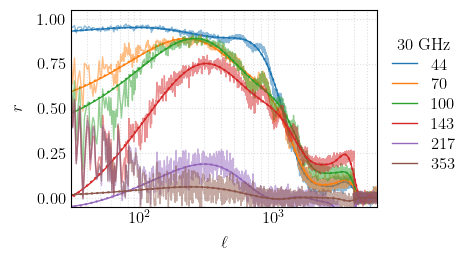

In [29]:
#if compute_corrcoeffs:
if True:

    paddingT = np.zeros((9,9,ellTot))
    paddingE = np.zeros((7,7,ellTot))
    paddingB = np.zeros((7,7,ellTot))
    for ii in range(9):
        paddingT[ii,ii,:] = 1.
        if ii<7: paddingE[ii,ii,:], paddingB[ii,ii,:] = 1., 1.

    paddingT[:,:,:ellMax] = coeff_matrix_T
    paddingE[:,:,:ellMax] = coeff_matrix_E
    paddingB[:,:,:ellMax] = coeff_matrix_B
    print(np.shape(paddingT), np.shape(paddingE), np.shape(paddingB))

    freq_names = [r'$30$', r'$44$', r'$70$', r'$100$', r'$143$', r'$217$', r'$353$', r'$545$', r'$857$']

    filtsz = 20
    elsmoo = 1500

    sm_coeff_matrix_T = np.copy(paddingT)
    for ri, row in enumerate(paddingT):
        if ri!=0: break
        keep = ri

        fig, ax = plt.subplots(1,1, figsize = (5.,2.8))
        colsdef = cycle(allcols)
        for ci, coeff in enumerate(row[:7]):
            if np.abs(ci-ri) < 2: 
                ellmin = 50
            else:
                ellmin = 110

            xl = np.arange(len(coeff))
            yl = coeff

            if ci!=ri:
                xll = xl[ellmin:]
                yll = coeff[ellmin:]
                yll = gaussian_filter1d(yll, filtsz, mode='nearest')

                cl = next(colsdef)
                plt.plot(xl, yl, lw=1, color=cl, alpha=0.5)
        #        plt.plot(xll, yll, lw=1, color=cl)

                with warnings.catch_warnings():
                    warnings.simplefilter('ignore', np.RankWarning)
                    z = np.poly1d(np.polyfit(xll, yll, 70))
                savez = z(xl)
                savez[(savez>=1.)] = 1.
                savez[(savez<=-1.)] = -1.
                savez[(xl<=10)&(savez<=0.)] = 0.

                maxzero = elsmoo + np.argmin(np.abs(savez[elsmoo:6000]))
                savez[xl>maxzero] = 0.

                plt.plot(xl, savez, color=cl, ls=':')
                savez[elsmoo:] = gaussian_filter1d(savez[elsmoo:], 2*filtsz, mode='nearest')
                savez = gaussian_filter1d(savez, filtsz/1.5, mode='nearest')
                plt.plot(xl, savez, lw=1, color=cl, ls='-', label=freq_names[ci])
            else:
                savez = yl

            savez[(savez>=1.)]  = 1.
            savez[(savez<=-1.)] = -1.
            sm_coeff_matrix_T[ri,ci] = savez
        plt.xlim((30, 6000))
        plt.ylim((-0.05, 1.05))
        plt.xscale('log')
        plt.ylabel(r'$r$')
        plt.xlabel(r'$\ell$')
        beautify(ax, bb=(1.,.1), ttl=freq_names[keep]+r'${\rm \; GHz}$')
        plt.tight_layout()
        plt.savefig('/home/dpirvu/axion/CristinaPlot_corrcoeffs.pdf')
        plt.show()


In [30]:
if compute_corrcoeffs:
    paddingT = np.zeros((9,9,ellTot))
    paddingE = np.zeros((7,7,ellTot))
    paddingB = np.zeros((7,7,ellTot))
    for ii in range(9):
        paddingT[ii,ii,:] = 1.
        if ii<7: paddingE[ii,ii,:], paddingB[ii,ii,:] = 1., 1.

    paddingT[:,:,:ellMax] = coeff_matrix_T
    paddingE[:,:,:ellMax] = coeff_matrix_E
    paddingB[:,:,:ellMax] = coeff_matrix_B
    print(np.shape(paddingT), np.shape(paddingE), np.shape(paddingB))

    freq_names = [r'$30$', r'$44$', r'$70$', r'$100$', r'$143$', r'$217$', r'$353$', r'$545$', r'$857$']
    
    filtsz = 20
    elsmoo = 1500

    sm_coeff_matrix_T = np.copy(paddingT)
    for ri, row in enumerate(paddingT):
        keep = ri

        fig, ax = plt.subplots(1,1, figsize = (5,3))
        colsdef = cycle(allcols)
        for ci, coeff in enumerate(row):
            if np.abs(ci-ri) < 2: 
                ellmin = 50
            else:
                ellmin = 110

            xl = np.arange(len(coeff))
            yl = coeff

            if ci!=ri:
                xll = xl[ellmin:]
                yll = coeff[ellmin:]
                yll = gaussian_filter1d(yll, filtsz, mode='nearest')

                cl = next(colsdef)
                plt.plot(xl, yl, lw=1, color=cl, alpha=0.5, label=freq_names[ci])
                plt.plot(xll, yll, lw=1, color=cl)

                with warnings.catch_warnings():
                    warnings.simplefilter('ignore', np.RankWarning)
                    z = np.poly1d(np.polyfit(xll, yll, 70))
                savez = z(xl)
                savez[(savez>=1.)] = 1.
                savez[(savez<=-1.)] = -1.
                savez[(xl<=10)&(savez<=0.)] = 0.

                maxzero = elsmoo + np.argmin(np.abs(savez[elsmoo:6000]))
                savez[xl>maxzero] = 0.

                plt.plot(xl, savez, color=cl, ls=':')
                savez[elsmoo:] = gaussian_filter1d(savez[elsmoo:], 2*filtsz, mode='nearest')
                savez = gaussian_filter1d(savez, filtsz/1.5, mode='nearest')
            else:
                savez = yl

            savez[(savez>=1.)] = 1.
            savez[(savez<=-1.)] = -1.
            plt.plot(xl, savez, lw=1, color='k', ls='-')
            sm_coeff_matrix_T[ri,ci] = savez

        plt.legend(title=freq_names[keep]+r'${\rm \; GHz}$', bbox_to_anchor=(1.,0.8))
        plt.xscale('log')
        plt.xlim((30, 6000))
        beautify(ax)
        plt.show()

    sm_coeff_matrix_T[np.isnan(sm_coeff_matrix_T)] = 0.
    np.save(path_dir+'smooth_correlation_coeff_matrix_T.npy', sm_coeff_matrix_T)


In [31]:
if compute_corrcoeffs:
    filtsz = 10
    elsmoo = 1500

    sm_coeff_matrix_E = np.copy(paddingE)
    for ri, row in enumerate(paddingE):
        keep = ri

        fig, ax = plt.subplots(1,1, figsize = (5,3))
        colsdef = cycle(allcols)
        for ci, coeff in enumerate(row):
            xl = np.arange(2, len(coeff))
            yl = coeff[2:]

            if ci!=ri:
                xll = xl
                yll = gaussian_filter1d(yl, filtsz, mode='nearest')

                cl = next(colsdef)
                plt.plot(xl, yl, lw=1, color=cl, alpha=0.5, label=freq_names[ci])
                plt.plot(xll, yll, lw=1, color=cl)

                with warnings.catch_warnings():
                    warnings.simplefilter('ignore', np.RankWarning)
                    z = np.poly1d(np.polyfit(xll, yll, 70))
                savez = z(xl)
                savez[(savez>=1.)] = 1.
                savez[(savez<=-1.)] = -1.
                savez[(xl<=10)&(savez<=0.)] = 0.

                maxzero = elsmoo + np.argmin(np.abs(savez[elsmoo:6000]))
                savez[xl>maxzero] = 0.

                plt.plot(xl, savez, color=cl, ls=':')

                savez[elsmoo:] = gaussian_filter1d(savez[elsmoo:], 2*filtsz, mode='nearest')
                savez = gaussian_filter1d(savez, filtsz, mode='nearest')
            else:
                savez = yl

            savez[(savez>=1.)] = 1.
            savez[(savez<=-1.)] = -1.
            plt.plot(xl, savez, lw=1, color='k', ls='-')
            sm_coeff_matrix_E[ri,ci,2:] = savez

        plt.legend(title=freq_names[keep]+r'${\rm \; GHz}$', bbox_to_anchor=(1.,0.8))
        plt.xscale('log')
        beautify(ax)
        plt.show()

    sm_coeff_matrix_E[np.isnan(sm_coeff_matrix_E)] = 0.
    np.save(path_dir+'smooth_correlation_coeff_matrix_E.npy', sm_coeff_matrix_E)


In [32]:
if compute_corrcoeffs:
    filtsz = 10
    elsmoo = 1500

    sm_coeff_matrix_B = np.copy(paddingB)
    for ri, row in enumerate(paddingB):
        keep = ri

        fig, ax = plt.subplots(1,1, figsize = (5,3))
        colsdef = cycle(allcols)
        for ci, coeff in enumerate(row):
            xl = np.arange(2, len(coeff))
            yl = coeff[2:]

            if ci!=ri:
                xll = xl
                yll = gaussian_filter1d(yl, filtsz, mode='nearest')

                cl = next(colsdef)
                plt.plot(xl, yl, lw=1, color=cl, alpha=0.5, label=freq_names[ci])
                plt.plot(xll, yll, lw=1, color=cl)

                with warnings.catch_warnings():
                    warnings.simplefilter('ignore', np.RankWarning)
                    z = np.poly1d(np.polyfit(xll, yll, 70))
                savez = z(xl)
                savez[(savez>=1.)] = 1.
                savez[(savez<=-1.)] = -1.
                savez[(xl<=10)&(savez<=0.)] = 0.

                maxzero = elsmoo + np.argmin(np.abs(savez[elsmoo:6000]))
                savez[xl>maxzero] = 0.

                plt.plot(xl, savez, color=cl, ls=':')

                savez[elsmoo:] = gaussian_filter1d(savez[elsmoo:], 2*filtsz, mode='nearest')
                savez = gaussian_filter1d(savez, filtsz, mode='nearest')
            else:
                savez = yl

            savez[(savez>=1.)] = 1.
            savez[(savez<=-1.)] = -1.
            plt.plot(xl, savez, lw=1, color='k', ls='-')
            sm_coeff_matrix_B[ri,ci,2:] = savez

        plt.legend(title=freq_names[keep]+r'${\rm \; GHz}$', bbox_to_anchor=(1.,0.8))
        plt.xscale('log')
        beautify(ax)
        plt.show()

    sm_coeff_matrix_B[np.isnan(sm_coeff_matrix_B)] = 0.
    np.save(path_dir+'smooth_correlation_coeff_matrix_B.npy', sm_coeff_matrix_B)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


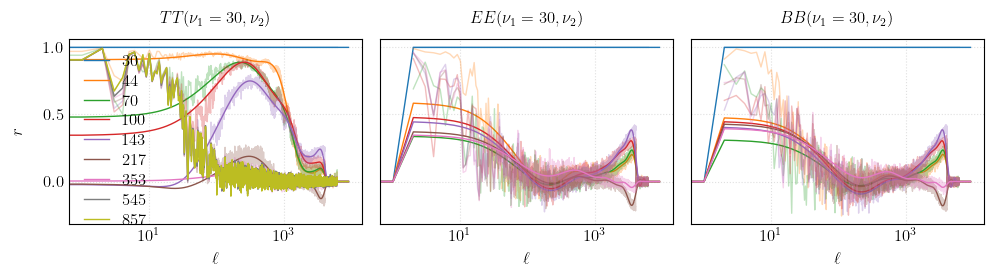

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


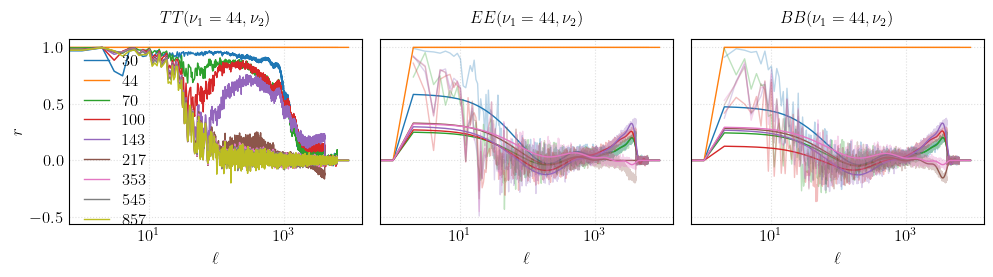

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


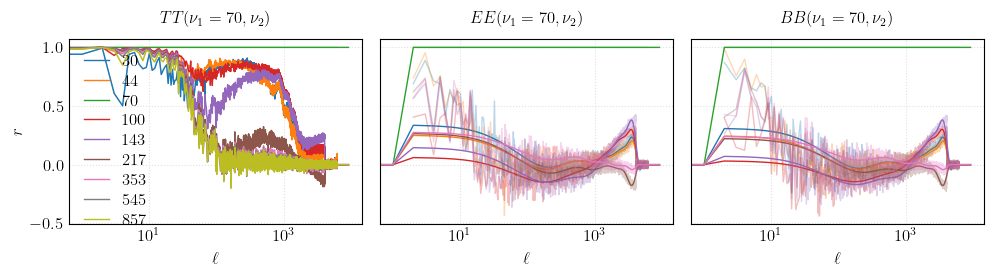

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


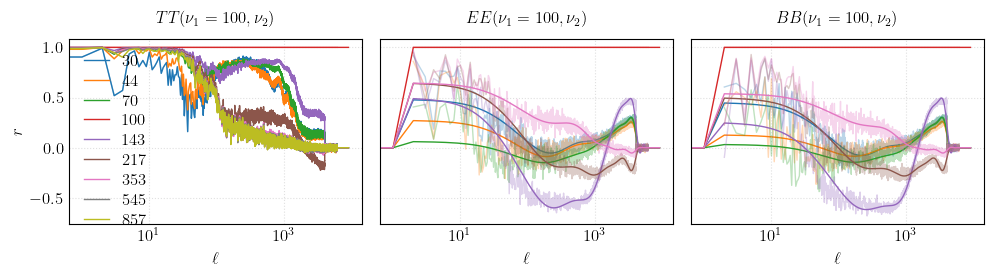

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


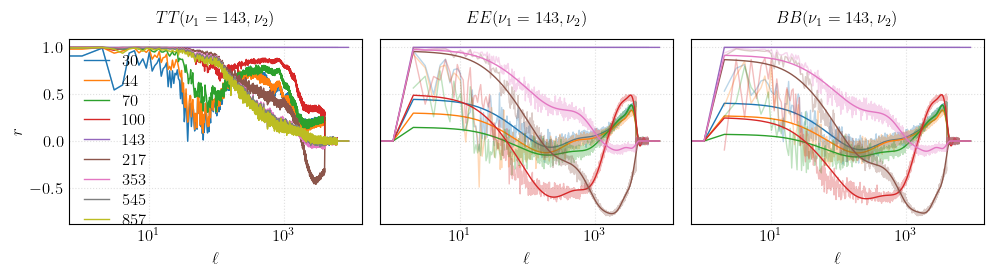

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


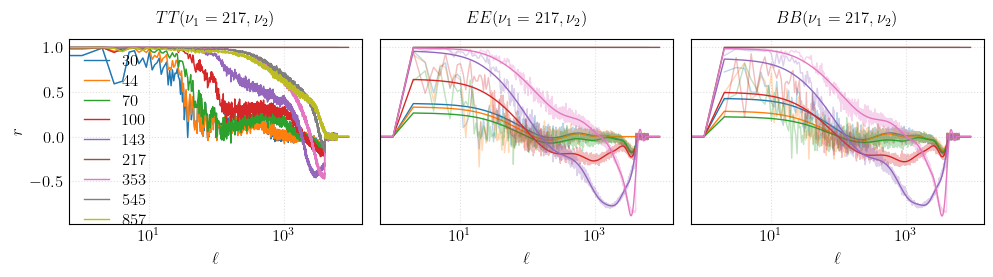

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


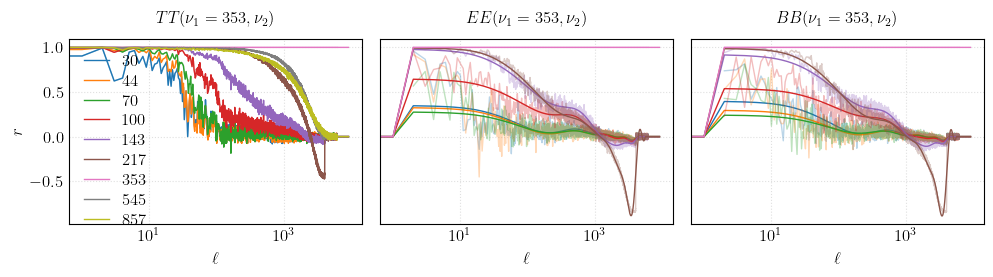

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


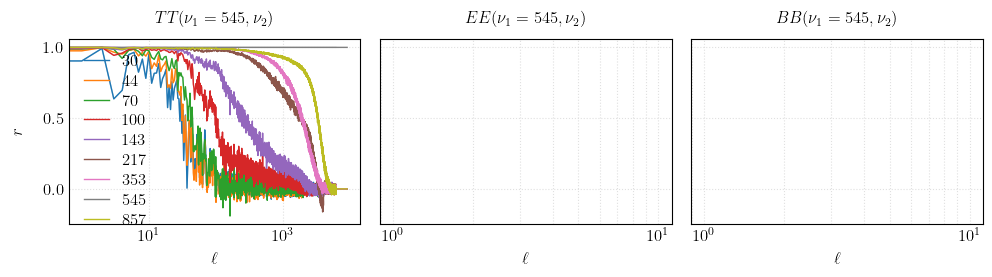

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


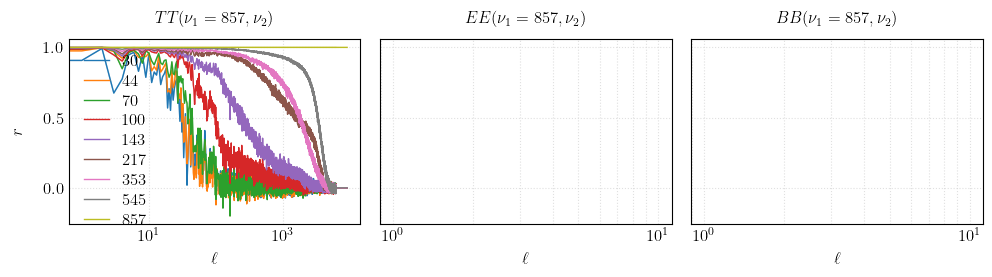

In [33]:
freq_names = [r'$30$', r'$44$', r'$70$', r'$100$', r'$143$', r'$217$', r'$353$', r'$545$', r'$857$']

xl2 = np.arange(ellTot)
xl1 = np.arange(ellMax)
for ri in range(9):
    fig, ax = plt.subplots(1,3, figsize = (10,3.), sharey=True)
    colsdef = cycle(allcols)
    keep = ri
    for ci in range(9):
        cl = next(colsdef)
        [aa.set_title([r'$TT(\nu_1={:.0f},\nu_2)$'.format(Planck_freqs[ri]),\
                       r'$EE(\nu_1={:.0f},\nu_2)$'.format(Planck_freqs[ri]),\
                       r'$BB(\nu_1={:.0f},\nu_2)$'.format(Planck_freqs[ri])][i]) for i, aa in enumerate(ax)]

        ax[0].plot(xl1, coeff_matrix_T[ri][ci], lw=1, color=cl, alpha=0.3)
        ax[0].plot(xl2, sm_coeff_matrix_T[ri][ci], lw=1, color=cl, label=freq_names[ci])
        try:
            ax[1].plot(xl1, coeff_matrix_E[ri][ci], lw=1, color=cl, alpha=0.3)
            ax[1].plot(xl2, sm_coeff_matrix_E[ri][ci], lw=1, color=cl)
            ax[2].plot(xl1, coeff_matrix_B[ri][ci], lw=1, color=cl, alpha=0.3)
            ax[2].plot(xl2, sm_coeff_matrix_B[ri][ci], lw=1, color=cl)
        except:
            continue

    [aa.set_xscale('log') for aa in ax]
    [aa.set_xlabel(r'$\ell$') for aa in ax]
    ax[0].set_ylabel(r'$r$')
    beautify(ax)
    plt.tight_layout()
    plt.show()

### Get Planck cross frequency foregrounds contamination

In [34]:
if compute_full_planck_fg:
    full_Planck_TT = np.zeros((ellTot, 9,9))
    for li, autoPS in enumerate(Planck_pspec_TT_fg):
        corrs  = np.sqrt(autoPS)
        matrix = np.outer(corrs, corrs)
        offdiag= coeff_matrix_T[:,:,li]

        full_Planck_TT[li] = offdiag * matrix

        if li%3500==10:
            print(li)
            fig, ax = plt.subplots(1,1, figsize = (3,2))
            plt.plot(Planck_freqs, corrs**2., 'bo-')
            [plt.plot(Planck_freqs[ff], (matrix*offdiag)[ff,ff], 'ro-', ms=5) for ff in range(len(Planck_freqs))]
            plt.yscale('log')
            beautify(ax)
            plt.show()

            fig, ax = plt.subplots(1,1, figsize = (2.5,2.5))
            exts = [Planck_freqs[0],Planck_freqs[-1],Planck_freqs[0],Planck_freqs[-1]]
            im = plt.contourf(Planck_freqs, Planck_freqs, (offdiag*matrix), ext=exts, origin='lower')
            #im = plt.imshow((offdiag*matrix), origin='lower')
            cbar = fig.colorbar(im, ax=ax, shrink=0.6)
            plt.show()

    np.save(path_dir+'Planck_foregrounds_TT.npy', full_Planck_TT)

In [35]:
if compute_full_planck_fg:
    full_Planck_EE = np.zeros((ellTot, 7,7))
    for li, autoPS in enumerate(Planck_pspec_EE_fg):
        corrs  = np.sqrt(autoPS)
        matrix = np.outer(corrs, corrs)
        offdiag= coeff_matrix_E[:,:,li]

        full_Planck_EE[li] = offdiag * matrix

        if li%3500==10:
            print(li)
            fig, ax = plt.subplots(1,1, figsize = (3,2))
            plt.plot(Planck_freqs[:-2], corrs**2., 'bo-')
            [plt.plot(Planck_freqs[ff], (matrix*offdiag)[ff,ff], 'ro-', ms=5) for ff in range(len(Planck_freqs[:-2]))]
            plt.yscale('log')
            beautify(ax)
            plt.show()

            fig, ax = plt.subplots(1,1, figsize = (2.5,2.5))
            im = plt.contourf(Planck_freqs[:-2], Planck_freqs[:-2], (offdiag*matrix), ext=exts, origin='lower')
            #im = plt.imshow((offdiag*matrix), origin='lower')
            cbar = fig.colorbar(im, ax=ax, shrink=0.6)
            plt.show()

    np.save(path_dir+'Planck_foregrounds_EE.npy', full_Planck_EE)

In [36]:
if compute_full_planck_fg:
    full_Planck_BB = np.zeros((ellTot, 7,7))
    for li, autoPS in enumerate(Planck_pspec_BB_fg):
        corrs  = np.sqrt(autoPS)
        matrix = np.outer(corrs, corrs)
        offdiag= coeff_matrix_B[:,:,li]

        full_Planck_BB[li] = offdiag * matrix

        if li%3500==10:
            print(li)
            fig, ax = plt.subplots(1,1, figsize = (3,2))
            plt.plot(Planck_freqs[:-2], corrs**2., 'bo-')
            [plt.plot(Planck_freqs[ff], (matrix*offdiag)[ff,ff], 'ro-', ms=5) for ff in range(len(Planck_freqs[:-2]))]
            plt.yscale('log')
            beautify(ax)
            plt.show()

            fig, ax = plt.subplots(1,1, figsize = (2.5,2.5))
            im = plt.contourf(Planck_freqs[:-2], Planck_freqs[:-2], (offdiag*matrix), ext=exts, origin='lower')
            #im = plt.imshow((offdiag*matrix), origin='lower')
            cbar = fig.colorbar(im, ax=ax, shrink=0.6)
            plt.show()

    np.save(path_dir+'Planck_foregrounds_BB.npy', full_Planck_BB)

### Get power law model at low ell for foregrounds from Planck data

In [74]:
if True:
    ls = np.arange(1, ellTot)

    model_30, model_44, model_70, model_100, model_143, model_217, model_353, model_545, model_857 = np.zeros((9, ellTot))
    model_30[ls]  = 3e-9   * ls**-2.5
    model_44[ls]  = 7e-10  * ls**-2.5
    model_70[ls]  = 4e-10  * ls**-2.5
    model_100[ls] = 3e-10  * ls**-2.5
    model_143[ls] = 7e-10  * ls**-2.5
    model_217[ls] = 1.5e-8 * ls**-3.
    model_353[ls] = 0.9e-6 * ls**-3.
    model_545[ls] = 2.5e-4 * ls**-3.
    model_857[ls] = 9e-1   * ls**-3.
    fg_models_T = np.array([model_30, model_44, model_70, model_100, model_143, model_217, model_353, model_545, model_857])
    np.save(path_dir+'power_law_models_T.npy', fg_models_T)

    model_30, model_44, model_70, model_100, model_143, model_217, model_353 = np.zeros((7, ellTot))
    model_30[ls]  = 5e-11  * ls**-2.5
    model_44[ls]  = 5.2e-12  * ls**-2.5
    model_70[ls]  = 0.5e-12  * ls**-2.5
    model_100[ls] = 0.5e-12  * ls**-2.5
    model_143[ls] = 1.5e-12  * ls**-2.5
    model_217[ls] = 5.5e-12  * ls**-2.5
    model_353[ls] = 0.8e-9 * ls**-2.5
    fg_models_E = np.array([model_30, model_44, model_70, model_100, model_143, model_217, model_353])
    np.save(path_dir+'power_law_models_E.npy', fg_models_E)

    model_30, model_44, model_70, model_100, model_143, model_217, model_353 = np.zeros((7, ellTot))
    model_30[ls]  = 5e-11  * ls**-2.5
    model_44[ls]  = 5.2e-12  * ls**-2.5
    model_70[ls]  = 0.5e-12  * ls**-2.5
    model_100[ls] = 0.5e-12  * ls**-2.5
    model_143[ls] = 1.5e-12  * ls**-2.5
    model_217[ls] = 5.5e-12  * ls**-2.5
    model_353[ls] = 0.8e-9 * ls**-2.5
    fg_models_B = np.array([model_30, model_44, model_70, model_100, model_143, model_217, model_353])
    np.save(path_dir+'power_law_models_B.npy', fg_models_B)

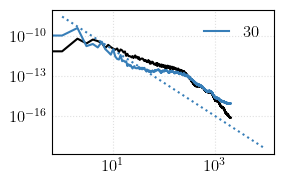

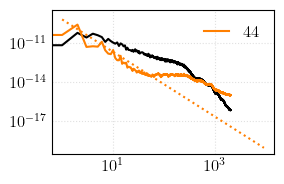

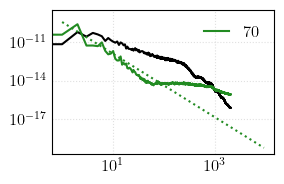

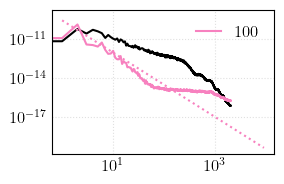

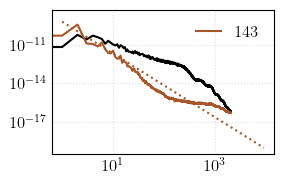

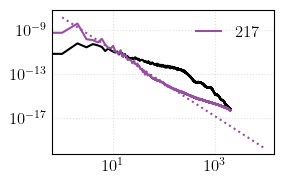

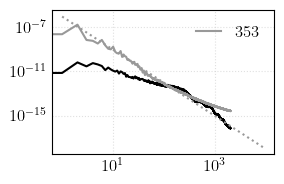

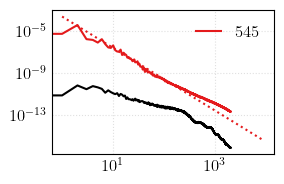

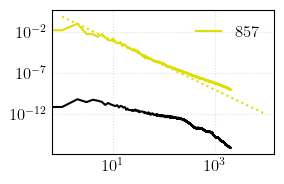

In [70]:
cychc = cycle(allcols)
ls2 = np.arange(1, ellTot)
ls1 = np.arange(ellMax)
model_30, model_44, model_70, model_100, model_143, model_217, model_353, model_545, model_857 = fg_models_T

col = next(cychc)
fig, ax = plt.subplots(1, 1, figsize=(3, 2))
plt.loglog(ls1, cmb_autospectra[0][ls1], color='k')
plt.loglog(ls1, Planck_pspec_TT_fg[:,0][ls1], color=col, label=r'${:.0f}$'.format(int(Planck_freqs[0])))
plt.loglog(ls2, model_30[ls2], color=col, ls=':')
beautify(ax); plt.tight_layout(); plt.show()

col = next(cychc)
fig, ax = plt.subplots(1, 1, figsize=(3, 2))
plt.loglog(ls1, cmb_autospectra[0][ls1], color='k')
plt.loglog(ls1, Planck_pspec_TT_fg[:,1][ls1], color=col, label=r'${:.0f}$'.format(int(Planck_freqs[1])))
plt.loglog(ls2, model_44[ls2], color=col, ls=':')
beautify(ax); plt.tight_layout(); plt.show()

col = next(cychc)
fig, ax = plt.subplots(1, 1, figsize=(3, 2))
plt.loglog(ls1, cmb_autospectra[0][ls1], color='k')
plt.loglog(ls1, Planck_pspec_TT_fg[:,2][ls1], color=col, label=r'${:.0f}$'.format(int(Planck_freqs[2])))
plt.loglog(ls2, model_70[ls2], color=col, ls=':')
beautify(ax); plt.tight_layout(); plt.show()

col = next(cychc)
fig, ax = plt.subplots(1, 1, figsize=(3, 2))
plt.loglog(ls1, cmb_autospectra[0][ls1], color='k')
plt.loglog(ls1, Planck_pspec_TT_fg[:,3][ls1], color=col, label=r'${:.0f}$'.format(int(Planck_freqs[3])))
plt.loglog(ls2, model_100[ls2], color=col, ls=':')
beautify(ax); plt.tight_layout(); plt.show()

col = next(cychc)
fig, ax = plt.subplots(1, 1, figsize=(3, 2))
plt.loglog(ls1, cmb_autospectra[0][ls1], color='k')
plt.loglog(ls1, Planck_pspec_TT_fg[:,4][ls1], color=col, label=r'${:.0f}$'.format(int(Planck_freqs[4])))
plt.loglog(ls2, model_143[ls2], color=col, ls=':')
beautify(ax); plt.tight_layout(); plt.show()

col = next(cychc)
fig, ax = plt.subplots(1, 1, figsize=(3, 2))
plt.loglog(ls1, cmb_autospectra[0][ls1], color='k')
plt.loglog(ls1, Planck_pspec_TT_fg[:,5][ls1], color=col, label=r'${:.0f}$'.format(int(Planck_freqs[5])))
plt.loglog(ls2, model_217[ls2], color=col, ls=':')
beautify(ax); plt.tight_layout(); plt.show()

col = next(cychc)
fig, ax = plt.subplots(1, 1, figsize=(3, 2))
plt.loglog(ls1, cmb_autospectra[0][ls1], color='k')
plt.loglog(ls1, Planck_pspec_TT_fg[:,6][ls1], color=col, label=r'${:.0f}$'.format(int(Planck_freqs[6])))
plt.loglog(ls2, model_353[ls2], color=col, ls=':')
beautify(ax); plt.tight_layout(); plt.show()

col = next(cychc)
fig, ax = plt.subplots(1, 1, figsize=(3, 2))
plt.loglog(ls1, cmb_autospectra[0][ls1], color='k')
plt.loglog(ls1, Planck_pspec_TT_fg[:,7][ls1], color=col, label=r'${:.0f}$'.format(int(Planck_freqs[7])))
plt.loglog(ls2, model_545[ls2], color=col, ls=':')
beautify(ax); plt.tight_layout(); plt.show()

col = next(cychc)
fig, ax = plt.subplots(1, 1, figsize=(3, 2))
plt.loglog(ls1, cmb_autospectra[0][ls1], color='k')
plt.loglog(ls1, Planck_pspec_TT_fg[:,8][ls1], color=col, label=r'${:.0f}$'.format(int(Planck_freqs[8])))
plt.loglog(ls2, model_857[ls2], color=col, ls=':')
beautify(ax); plt.tight_layout(); plt.show()


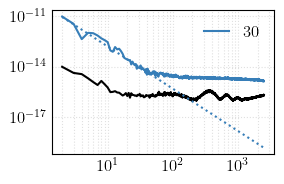

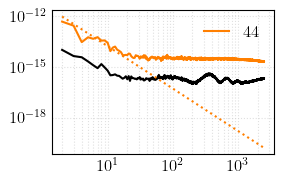

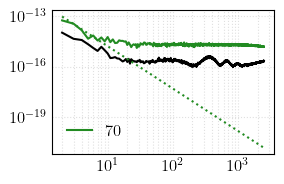

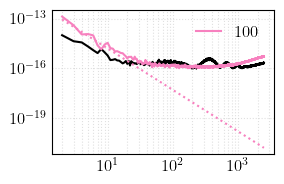

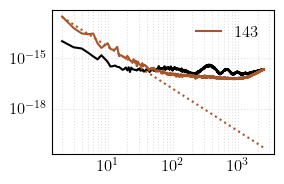

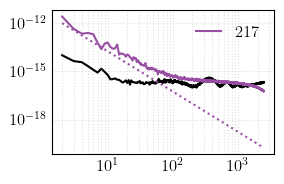

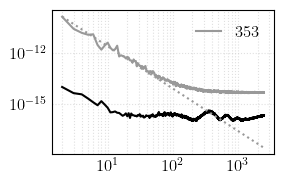

In [75]:
cychc = cycle(allcols)
ls1 = np.arange(2, 2500)
ls2 = np.arange(2, 2500)
model_30, model_44, model_70, model_100, model_143, model_217, model_353 = fg_models_E

col = next(cychc)
fig, ax = plt.subplots(1, 1, figsize=(3, 2))
plt.loglog(ls1, cmb_autospectra[1][ls1], color='k')
plt.loglog(ls1, Planck_pspec_EE_fg[ls1,0], color=col, label=r'${:.0f}$'.format(int(Planck_freqs[0])))
plt.loglog(ls2, model_30[ls2], color=col, ls=':')
beautify(ax); plt.tight_layout(); plt.show()

col = next(cychc)
fig, ax = plt.subplots(1, 1, figsize=(3, 2))
plt.loglog(ls1, cmb_autospectra[1][ls1], color='k')
plt.loglog(ls1, Planck_pspec_EE_fg[ls1,1], color=col, label=r'${:.0f}$'.format(int(Planck_freqs[1])))
plt.loglog(ls2, model_44[ls2], color=col, ls=':')
beautify(ax); plt.tight_layout(); plt.show()

col = next(cychc)
fig, ax = plt.subplots(1, 1, figsize=(3, 2))
plt.loglog(ls1, cmb_autospectra[1][ls1], color='k')
plt.loglog(ls1, Planck_pspec_EE_fg[ls1,2], color=col, label=r'${:.0f}$'.format(int(Planck_freqs[2])))
plt.loglog(ls2, model_70[ls2], color=col, ls=':')
beautify(ax); plt.tight_layout(); plt.show()

col = next(cychc)
fig, ax = plt.subplots(1, 1, figsize=(3, 2))
plt.loglog(ls1, cmb_autospectra[1][ls1], color='k')
plt.loglog(ls1, Planck_pspec_EE_fg[ls1,3], color=col, label=r'${:.0f}$'.format(int(Planck_freqs[3])))
plt.loglog(ls2, model_100[ls2], color=col, ls=':')
beautify(ax); plt.tight_layout(); plt.show()

col = next(cychc)
fig, ax = plt.subplots(1, 1, figsize=(3, 2))
plt.loglog(ls1, cmb_autospectra[1][ls1], color='k')
plt.loglog(ls1, Planck_pspec_EE_fg[ls1,4], color=col, label=r'${:.0f}$'.format(int(Planck_freqs[4])))
plt.loglog(ls2, model_143[ls2], color=col, ls=':')
beautify(ax); plt.tight_layout(); plt.show()

col = next(cychc)
fig, ax = plt.subplots(1, 1, figsize=(3, 2))
plt.loglog(ls1, cmb_autospectra[1][ls1], color='k')
plt.loglog(ls1, Planck_pspec_EE_fg[ls1,5], color=col, label=r'${:.0f}$'.format(int(Planck_freqs[5])))
plt.loglog(ls2, model_217[ls2], color=col, ls=':')
beautify(ax); plt.tight_layout(); plt.show()

col = next(cychc)
fig, ax = plt.subplots(1, 1, figsize=(3, 2))
plt.loglog(ls1, cmb_autospectra[1][ls1], color='k')
plt.loglog(ls1, Planck_pspec_EE_fg[ls1,6], color=col, label=r'${:.0f}$'.format(int(Planck_freqs[6])))
plt.loglog(ls2, model_353[ls2], color=col, ls=':')
beautify(ax); plt.tight_layout(); plt.show()


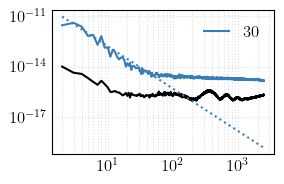

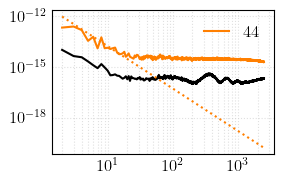

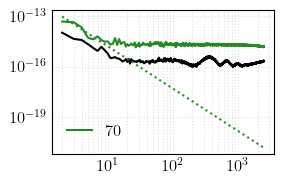

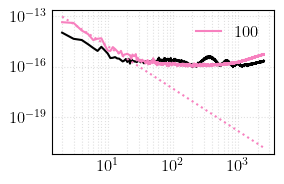

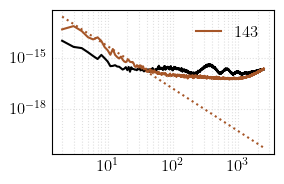

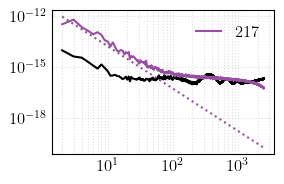

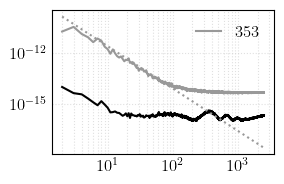

In [76]:
cychc = cycle(allcols)
ls1 = np.arange(2, 2500)
ls2 = np.arange(2, 2500)
model_30, model_44, model_70, model_100, model_143, model_217, model_353 = fg_models_B

col = next(cychc)
fig, ax = plt.subplots(1, 1, figsize=(3, 2))
plt.loglog(ls1, cmb_autospectra[1][ls1], color='k')
plt.loglog(ls1, Planck_pspec_BB_fg[ls1,0], color=col, label=r'${:.0f}$'.format(int(Planck_freqs[0])))
plt.loglog(ls2, model_30[ls2], color=col, ls=':')
beautify(ax); plt.tight_layout(); plt.show()

col = next(cychc)
fig, ax = plt.subplots(1, 1, figsize=(3, 2))
plt.loglog(ls1, cmb_autospectra[1][ls1], color='k')
plt.loglog(ls1, Planck_pspec_BB_fg[ls1,1], color=col, label=r'${:.0f}$'.format(int(Planck_freqs[1])))
plt.loglog(ls2, model_44[ls2], color=col, ls=':')
beautify(ax); plt.tight_layout(); plt.show()

col = next(cychc)
fig, ax = plt.subplots(1, 1, figsize=(3, 2))
plt.loglog(ls1, cmb_autospectra[1][ls1], color='k')
plt.loglog(ls1, Planck_pspec_BB_fg[ls1,2], color=col, label=r'${:.0f}$'.format(int(Planck_freqs[2])))
plt.loglog(ls2, model_70[ls2], color=col, ls=':')
beautify(ax); plt.tight_layout(); plt.show()

col = next(cychc)
fig, ax = plt.subplots(1, 1, figsize=(3, 2))
plt.loglog(ls1, cmb_autospectra[1][ls1], color='k')
plt.loglog(ls1, Planck_pspec_BB_fg[ls1,3], color=col, label=r'${:.0f}$'.format(int(Planck_freqs[3])))
plt.loglog(ls2, model_100[ls2], color=col, ls=':')
beautify(ax); plt.tight_layout(); plt.show()

col = next(cychc)
fig, ax = plt.subplots(1, 1, figsize=(3, 2))
plt.loglog(ls1, cmb_autospectra[1][ls1], color='k')
plt.loglog(ls1, Planck_pspec_BB_fg[ls1,4], color=col, label=r'${:.0f}$'.format(int(Planck_freqs[4])))
plt.loglog(ls2, model_143[ls2], color=col, ls=':')
beautify(ax); plt.tight_layout(); plt.show()

col = next(cychc)
fig, ax = plt.subplots(1, 1, figsize=(3, 2))
plt.loglog(ls1, cmb_autospectra[1][ls1], color='k')
plt.loglog(ls1, Planck_pspec_BB_fg[ls1,5], color=col, label=r'${:.0f}$'.format(int(Planck_freqs[5])))
plt.loglog(ls2, model_217[ls2], color=col, ls=':')
beautify(ax); plt.tight_layout(); plt.show()

col = next(cychc)
fig, ax = plt.subplots(1, 1, figsize=(3, 2))
plt.loglog(ls1, cmb_autospectra[1][ls1], color='k')
plt.loglog(ls1, Planck_pspec_BB_fg[ls1,6], color=col, label=r'${:.0f}$'.format(int(Planck_freqs[6])))
plt.loglog(ls2, model_353[ls2], color=col, ls=':')
beautify(ax); plt.tight_layout(); plt.show()


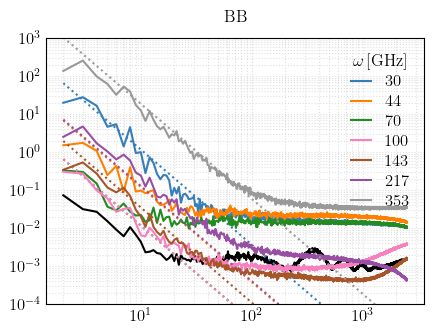

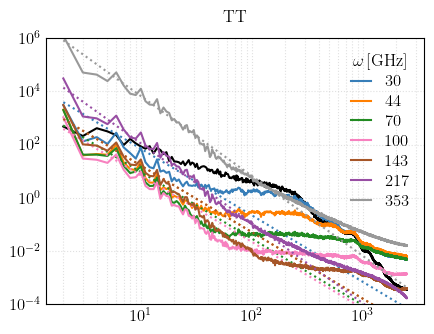

In [97]:
cychc = cycle(allcols)
ls1 = np.arange(2, 2500)
ls2 = np.arange(2, 2500)
model_30, model_44, model_70, model_100, model_143, model_217, model_353 = fg_models_B

fig, ax = plt.subplots(1, 1, figsize=(4.5, 3.5))
plt.loglog(ls1, TCMB**2. * cmb_autospectra[1][ls1], color='k')

col = next(cychc)
plt.loglog(ls1, TCMB**2. * Planck_pspec_BB_fg[ls1,0], color=col, label=r'${:.0f}$'.format(int(Planck_freqs[0])))
plt.loglog(ls2, TCMB**2. * model_30[ls2], color=col, ls=':')

col = next(cychc)
plt.loglog(ls1, TCMB**2. * Planck_pspec_BB_fg[ls1,1], color=col, label=r'${:.0f}$'.format(int(Planck_freqs[1])))
plt.loglog(ls2, TCMB**2. * model_44[ls2], color=col, ls=':')

col = next(cychc)
plt.loglog(ls1, TCMB**2. * Planck_pspec_BB_fg[ls1,2], color=col, label=r'${:.0f}$'.format(int(Planck_freqs[2])))
plt.loglog(ls2, TCMB**2. * model_70[ls2], color=col, ls=':')

col = next(cychc)
plt.loglog(ls1, TCMB**2. * Planck_pspec_BB_fg[ls1,3], color=col, label=r'${:.0f}$'.format(int(Planck_freqs[3])))
plt.loglog(ls2, TCMB**2. * model_100[ls2], color=col, ls=':')

col = next(cychc)
plt.loglog(ls1, TCMB**2. * Planck_pspec_BB_fg[ls1,4], color=col, label=r'${:.0f}$'.format(int(Planck_freqs[4])))
plt.loglog(ls2, TCMB**2. * model_143[ls2], color=col, ls=':')

col = next(cychc)
plt.loglog(ls1, TCMB**2. * Planck_pspec_BB_fg[ls1,5], color=col, label=r'${:.0f}$'.format(int(Planck_freqs[5])))
plt.loglog(ls2, TCMB**2. * model_217[ls2], color=col, ls=':')

col = next(cychc)
plt.loglog(ls1, TCMB**2. * Planck_pspec_BB_fg[ls1,6], color=col, label=r'${:.0f}$'.format(int(Planck_freqs[6])))
plt.loglog(ls2, TCMB**2. * model_353[ls2], color=col, ls=':')
plt.ylim(1e-4,1e3)
#ax.set_xscale('linear')
beautify(ax)
ax.set_title(r'$\rm BB$')
ax.legend(fontsize=12, ncol=1, title=r'$\omega \, [{\rm GHz}]$', loc=1, frameon=False, handlelength=1.2, labelspacing=0.3, columnspacing=1)
plt.tight_layout()
plt.savefig('./plots/foregs_PlanckBB.pdf')
plt.show()


model_30, model_44, model_70, model_100, model_143, model_217, model_353, model_545, model_857 = fg_models_T

fig, ax = plt.subplots(1, 1, figsize=(4.5, 3.5))

cychc = cycle(allcols)
col = next(cychc)
plt.loglog(ls1, TCMB**2. * cmb_autospectra[0][ls1], color='k')
plt.loglog(ls1, TCMB**2. * Planck_pspec_TT_fg[:,0][ls1], color=col, label=r'${:.0f}$'.format(int(Planck_freqs[0])))
plt.loglog(ls2, TCMB**2. * model_30[ls2], color=col, ls=':')

col = next(cychc)
plt.loglog(ls1, TCMB**2. * Planck_pspec_TT_fg[:,1][ls1], color=col, label=r'${:.0f}$'.format(int(Planck_freqs[1])))
plt.loglog(ls2, TCMB**2. * model_44[ls2], color=col, ls=':')

col = next(cychc)
plt.loglog(ls1, TCMB**2. * Planck_pspec_TT_fg[:,2][ls1], color=col, label=r'${:.0f}$'.format(int(Planck_freqs[2])))
plt.loglog(ls2, TCMB**2. * model_70[ls2], color=col, ls=':')

col = next(cychc)
plt.loglog(ls1, TCMB**2. * Planck_pspec_TT_fg[:,3][ls1], color=col, label=r'${:.0f}$'.format(int(Planck_freqs[3])))
plt.loglog(ls2, TCMB**2. * model_100[ls2], color=col, ls=':')

col = next(cychc)
plt.loglog(ls1, TCMB**2. * Planck_pspec_TT_fg[:,4][ls1], color=col, label=r'${:.0f}$'.format(int(Planck_freqs[4])))
plt.loglog(ls2, TCMB**2. * model_143[ls2], color=col, ls=':')

col = next(cychc)
plt.loglog(ls1, TCMB**2. * Planck_pspec_TT_fg[:,5][ls1], color=col, label=r'${:.0f}$'.format(int(Planck_freqs[5])))
plt.loglog(ls2, TCMB**2. * model_217[ls2], color=col, ls=':')

col = next(cychc)
plt.loglog(ls1, TCMB**2. * Planck_pspec_TT_fg[:,6][ls1], color=col, label=r'${:.0f}$'.format(int(Planck_freqs[6])))
plt.loglog(ls2, TCMB**2. * model_353[ls2], color=col, ls=':')

plt.ylim(1e-4,1e6)
#ax.set_xscale('linear')
beautify(ax)
ax.legend(fontsize=12, ncol=1, title=r'$\omega \, [{\rm GHz}]$', loc=1, frameon=False, handlelength=1.2, labelspacing=0.3, columnspacing=1)
ax.set_title(r'$\rm TT$')
plt.tight_layout()
plt.savefig('./plots/foregs_PlanckTT.pdf')
plt.show()

### Extrapolate power law model onyo S4 frequencies

In [41]:
finterp = interp1d(Planck_freqs, fg_models_T[:,1], fill_value="extrapolate")
new_coeffs_T = finterp(S4_freqs)

finterp = interp1d(Planck_freqs[:-2], fg_models_E[:,1], fill_value="extrapolate")
new_coeffs_E = finterp(S4_freqs)

finterp = interp1d(Planck_freqs[:-2], fg_models_B[:,1], fill_value="extrapolate")
new_coeffs_B = finterp(S4_freqs)

if compute_power_laws:
    ls = np.arange(1,ellTot)

    fg_s4_model_20, fg_s4_model_27, fg_s4_model_39, fg_s4_model_93, fg_s4_model_145, fg_s4_model_225, fg_s4_model_278 = np.empty((7, ellTot))
    fg_s4_model_20[ls] = new_coeffs_T[0] * ls**-2.5
    fg_s4_model_27[ls] = new_coeffs_T[1] * ls**-2.5
    fg_s4_model_39[ls] = new_coeffs_T[2] * ls**-2.5
    fg_s4_model_93[ls] = new_coeffs_T[3] * ls**-2.5
    fg_s4_model_145[ls]= new_coeffs_T[4] * ls**-2.5
    fg_s4_model_225[ls]= new_coeffs_T[5] * ls**-3.
    fg_s4_model_278[ls]= new_coeffs_T[6] * ls**-3.
    data = np.array([fg_s4_model_20, fg_s4_model_27, fg_s4_model_39, fg_s4_model_93, fg_s4_model_145, fg_s4_model_225, fg_s4_model_278])
    S4_fg_models_T = data.T
    np.save(path_dir + 'S4_power_law_foregrounds_T.npy', S4_fg_models_T)

    fg_s4_model_20, fg_s4_model_27, fg_s4_model_39, fg_s4_model_93, fg_s4_model_145, fg_s4_model_225, fg_s4_model_278 = np.empty((7, ellTot))
    fg_s4_model_20[ls] = new_coeffs_E[0] * ls**-2.5
    fg_s4_model_27[ls] = new_coeffs_E[1] * ls**-2.5
    fg_s4_model_39[ls] = new_coeffs_E[2] * ls**-2.5
    fg_s4_model_93[ls] = new_coeffs_E[3] * ls**-2.5
    fg_s4_model_145[ls]= new_coeffs_E[4] * ls**-2.5
    fg_s4_model_225[ls]= new_coeffs_E[5] * ls**-3.
    fg_s4_model_278[ls]= new_coeffs_E[6] * ls**-3.
    data = np.array([fg_s4_model_20, fg_s4_model_27, fg_s4_model_39, fg_s4_model_93, fg_s4_model_145, fg_s4_model_225, fg_s4_model_278])
    S4_fg_models_E = data.T
    np.save(path_dir + 'S4_power_law_foregrounds_E.npy', S4_fg_models_E)

    fg_s4_model_20, fg_s4_model_27, fg_s4_model_39, fg_s4_model_93, fg_s4_model_145, fg_s4_model_225, fg_s4_model_278 = np.empty((7, ellTot))
    fg_s4_model_20[ls] = new_coeffs_B[0] * ls**-2.5
    fg_s4_model_27[ls] = new_coeffs_B[1] * ls**-2.5
    fg_s4_model_39[ls] = new_coeffs_B[2] * ls**-2.5
    fg_s4_model_93[ls] = new_coeffs_B[3] * ls**-2.5
    fg_s4_model_145[ls]= new_coeffs_B[4] * ls**-2.5
    fg_s4_model_225[ls]= new_coeffs_B[5] * ls**-3.
    fg_s4_model_278[ls]= new_coeffs_B[6] * ls**-3.
    data = np.array([fg_s4_model_20, fg_s4_model_27, fg_s4_model_39, fg_s4_model_93, fg_s4_model_145, fg_s4_model_225, fg_s4_model_278])
    S4_fg_models_B = data.T
    np.save(path_dir + 'S4_power_law_foregrounds_B.npy', S4_fg_models_B)


In [42]:
allcols = np.array(allcolors)

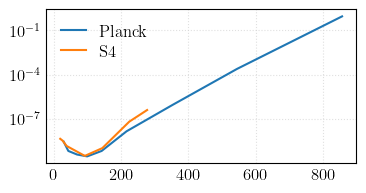

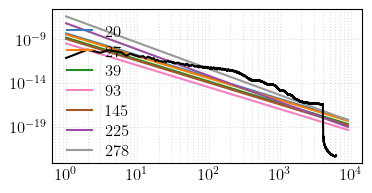

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(4, 2))
plt.plot(Planck_freqs, fg_models_T[:,1], label=r'$\rm Planck$')
plt.plot(S4_freqs, new_coeffs_T, label=r'$\rm S4$')
plt.yscale('log')
beautify(ax)
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(4, 2))
ls2, ls1 = np.arange(1, ellTot), np.arange(1, ellMax)
[plt.loglog(ls2, S4_fg_models_T[ls2, ii], color=allcols[ii], label=r'${:.0f}$'.format(int(S4_freqs[ii]))) for ii in range(7)]
plt.loglog(ls1, cmb_autospectra[0][ls1], color='k')
beautify(ax)
plt.show()


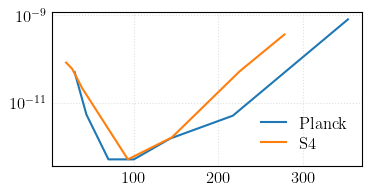

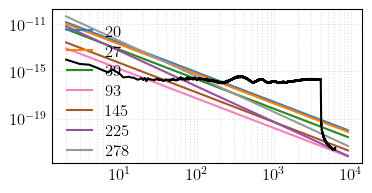

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(4, 2))
plt.plot(Planck_freqs[:-2], fg_models_E[:,1], label=r'$\rm Planck$')
plt.plot(S4_freqs, new_coeffs_E, label=r'$\rm S4$')
plt.yscale('log')
beautify(ax)
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(4, 2))
ls2, ls1 = np.arange(2, ellTot), np.arange(2, ellMax)
[plt.loglog(ls2, S4_fg_models_E[ls2,ii], color=allcols[ii], label=r'${:.0f}$'.format(int(S4_freqs[ii]))) for ii in range(7)]
plt.loglog(ls1, cmb_autospectra[1][ls1], color='k')
beautify(ax)
plt.show()


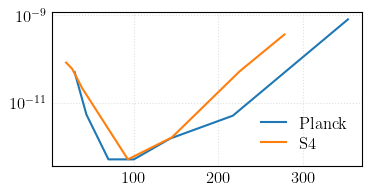

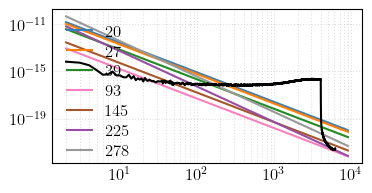

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(4, 2))
plt.plot(Planck_freqs[:-2], fg_models_B[:,1], label=r'$\rm Planck$')
plt.plot(S4_freqs, new_coeffs_B, label=r'$\rm S4$')
plt.yscale('log')
beautify(ax)
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(4, 2))
ls2, ls1 = np.arange(2, ellTot), np.arange(2, ellMax)
[plt.loglog(ls2, S4_fg_models_B[ls2,ii], color=allcols[ii], label=r'${:.0f}$'.format(int(S4_freqs[ii]))) for ii in range(7)]
plt.loglog(ls1, cmb_autospectra[2][ls1], color='k')
beautify(ax)
plt.show()


### Extrapolate correlation coefficients onto S4 frequencies

In [46]:
if compute_S4_corrcoeffs:
    znew, s4_coeff_matrix_T = np.zeros((2, len(S4_freqs), len(S4_freqs), ellTot))

    for li in range(ellTot):
        # interpolate data onto S4 frequencies grid
        fx, fy = np.meshgrid(Planck_freqs, Planck_freqs)
        f      = interp2d(fx, fy, sm_coeff_matrix_T[:,:,li], kind='linear')
        ztest  = f(S4_freqs, S4_freqs)
        ztest = np.maximum(ztest, ztest.transpose())
        znew[:,:,li] = ztest

    for ii in range(7): znew[ii,ii,:] = 1.
    znew[(znew>=1.)] = 1.
    znew[(znew<=0.)] = 0.
    s4_coeff_matrix_T = gaussian_filter(znew, sigma=(5, 5, 20), mode='nearest')
    for ii in range(7): s4_coeff_matrix_T[ii,ii,:] = 1.

    for li in range(ellTot):
        if li%3500==2:
            print(li)
            fig, ax = plt.subplots(1,3, figsize = (10,2.5))
            im = ax[0].contourf(Planck_freqs, Planck_freqs, sm_coeff_matrix_T[:,:,li], aspect='equal', origin='lower')
            cbar = fig.colorbar(im, ax=ax[0], shrink=0.6)
            im = ax[1].contourf(S4_freqs, S4_freqs, znew[:,:,li], aspect='equal', origin='lower')
            cbar = fig.colorbar(im, ax=ax[1], shrink=0.6)
            print(s4_coeff_matrix_T[:,:,li])
            im = ax[2].contourf(S4_freqs, S4_freqs, s4_coeff_matrix_T[:,:,li], aspect='equal', origin='lower')
            cbar = fig.colorbar(im, ax=ax[2], shrink=0.6)
            beautify(ax)
            plt.tight_layout(); plt.show()

    np.save(path_dir + 's4_correlation_coeff_matrix_T.npy', s4_coeff_matrix_T)

In [47]:
if compute_S4_corrcoeffs:
    znew, s4_coeff_matrix_E = np.zeros((2, len(S4_freqs), len(S4_freqs), ellTot))

    for li in range(2, ellTot):
        # interpolate data onto S4 frequencies grid
        fx, fy = np.meshgrid(Planck_freqs[:-2], Planck_freqs[:-2])
        f      = interp2d(fx, fy, sm_coeff_matrix_E[:,:,li], kind='linear', bounds_error=False)
        ztest  = f(S4_freqs, S4_freqs)
        ztest = np.maximum(ztest, ztest.transpose())
        znew[:,:,li] = ztest

    for ii in range(7): znew[ii,ii,2:] = 1.
    znew[(znew>=1.)] = 1.
    znew[(znew<=0.)] = 0.
    s4_coeff_matrix_E[:,:,2:] = gaussian_filter(znew[:,:,2:], sigma=(5, 5, 20), mode='nearest')
    for ii in range(7): s4_coeff_matrix_E[ii,ii,2:] = 1.

    for li in range(ellTot):
        if li%3500==2:
            print(li)
            fig, ax = plt.subplots(1,3, figsize = (10,2.5))
            im = ax[0].contourf(Planck_freqs[:-2], Planck_freqs[:-2], sm_coeff_matrix_E[:,:,li], aspect='equal', origin='lower')
            cbar = fig.colorbar(im, ax=ax[0], shrink=0.6)
            im = ax[1].contourf(S4_freqs, S4_freqs, znew[:,:,li], aspect='equal', origin='lower')
            cbar = fig.colorbar(im, ax=ax[1], shrink=0.6)
            print(s4_coeff_matrix_E[:,:,li])
            im = ax[2].contourf(S4_freqs, S4_freqs, s4_coeff_matrix_E[:,:,li], aspect='equal', origin='lower')
            cbar = fig.colorbar(im, ax=ax[2], shrink=0.6)
            beautify(ax)
            plt.tight_layout(); plt.show()

    np.save(path_dir + 's4_correlation_coeff_matrix_E.npy', s4_coeff_matrix_E)

# if compute_S4_corrcoeffs:
    znew, s4_coeff_matrix_B = np.zeros((2, len(S4_freqs), len(S4_freqs), ellTot))

    for li in range(2, ellTot):
        # interpolate data onto S4 frequencies grid
        fx, fy = np.meshgrid(Planck_freqs[:-2], Planck_freqs[:-2])
        f      = interp2d(fx, fy, sm_coeff_matrix_B[:,:,li], kind='linear', bounds_error=False)
        ztest  = f(S4_freqs, S4_freqs)
        ztest = np.maximum(ztest, ztest.transpose())
        znew[:,:,li] = ztest

    for ii in range(7): znew[ii,ii,2:] = 1.
    znew[(znew>=1.)] = 1.
    znew[(znew<=0.)] = 0.
    s4_coeff_matrix_B[:,:,2:] = gaussian_filter(znew[:,:,2:], sigma=(5, 5, 20), mode='nearest')
    for ii in range(7): s4_coeff_matrix_B[ii,ii,2:] = 1.

    for li in range(ellTot):
        if li%3500==5:
            print(li)
            fig, ax = plt.subplots(1,3, figsize = (10,2.5))
            im = ax[0].contourf(Planck_freqs[:-2], Planck_freqs[:-2], sm_coeff_matrix_B[:,:,li], aspect='equal', origin='lower')
            cbar = fig.colorbar(im, ax=ax[0], shrink=0.6)
            im = ax[1].contourf(S4_freqs, S4_freqs, znew[:,:,li], aspect='equal', origin='lower')
            cbar = fig.colorbar(im, ax=ax[1], shrink=0.6)
            print(s4_coeff_matrix_B[:,:,li])
            im = ax[2].contourf(S4_freqs, S4_freqs, s4_coeff_matrix_B[:,:,li], aspect='equal', origin='lower')
            cbar = fig.colorbar(im, ax=ax[2], shrink=0.6)
            beautify(ax)
            plt.tight_layout(); plt.show()

    np.save(path_dir + 's4_correlation_coeff_matrix_B.npy', s4_coeff_matrix_B)

### Now compute cross-frquency foregrounds model for S4

In [48]:
if compute_full_s4_fg:
    S4_pspec_TT_fg = np.zeros((ellTot, 7, 7))
    for li, autoPS in enumerate(S4_fg_models_T):
        corrs   = np.sqrt(autoPS)
        matrix  = np.outer(corrs, corrs)
        offdiag = s4_coeff_matrix_T[:,:,li]

        S4_pspec_TT_fg[li] = offdiag * matrix

        if li%3500==10:
            print(li)
            fig, ax = plt.subplots(1,2, figsize = (5.5,2.))
            ax[0].plot(S4_freqs, corrs**2., 'bo-')
            [ax[0].plot(S4_freqs[ff], S4_pspec_TT_fg[li][ff,ff], 'ro-', ms=5) for ff in range(len(S4_freqs))]
            ax[0].set_yscale('log')
            im = ax[1].contourf(S4_freqs, S4_freqs, S4_pspec_TT_fg[li], origin='lower')
            cbar = fig.colorbar(im, ax=ax[1], shrink=0.6)
            beautify(ax)
            plt.tight_layout(); plt.show()

    np.save(path_dir+'S4_foregrounds_TT.npy', S4_pspec_TT_fg)

In [49]:
if compute_full_s4_fg:
    S4_pspec_EE_fg = np.zeros((ellTot, 7, 7))
    for li, autoPS in enumerate(S4_fg_models_E):
        corrs   = np.sqrt(autoPS)
        matrix  = np.outer(corrs, corrs)
        offdiag = s4_coeff_matrix_E[:,:,li]

        S4_pspec_EE_fg[li] = offdiag * matrix

        if li%3500==10:
            print(li)
            fig, ax = plt.subplots(1,2, figsize = (5.5,2.))
            ax[0].plot(S4_freqs, corrs**2., 'bo-')
            [ax[0].plot(S4_freqs[ff], S4_pspec_EE_fg[li][ff,ff], 'ro-', ms=5) for ff in range(len(S4_freqs))]
            ax[0].set_yscale('log')
            im = ax[1].contourf(S4_freqs, S4_freqs, S4_pspec_EE_fg[li], origin='lower')
            cbar = fig.colorbar(im, ax=ax[1], shrink=0.6)
            beautify(ax)
            plt.tight_layout(); plt.show()

    np.save(path_dir+'S4_foregrounds_EE.npy', S4_pspec_EE_fg)

In [50]:
if compute_full_s4_fg:
    S4_pspec_BB_fg = np.zeros((ellTot, 7, 7))
    for li, autoPS in enumerate(S4_fg_models_B):
        corrs   = np.sqrt(autoPS)
        matrix  = np.outer(corrs, corrs)
        offdiag = s4_coeff_matrix_B[:,:,li]

        S4_pspec_BB_fg[li] = offdiag * matrix

        if li%3500==10:
            print(li)
            fig, ax = plt.subplots(1,2, figsize = (5.5,2.))
            ax[0].plot(S4_freqs, corrs**2., 'bo-')
            [ax[0].plot(S4_freqs[ff], S4_pspec_BB_fg[li][ff,ff], 'ro-', ms=5) for ff in range(len(S4_freqs))]
            ax[0].set_yscale('log')
            im = ax[1].contourf(S4_freqs, S4_freqs, S4_pspec_BB_fg[li], origin='lower')
            cbar = fig.colorbar(im, ax=ax[1], shrink=0.6)
            beautify(ax)
            plt.tight_layout(); plt.show()

    np.save(path_dir+'S4_foregrounds_BB.npy', S4_pspec_BB_fg)

### Get CIB from Websky

In [51]:
if compute_cib_from_websky:
    # S4 freuqencies CIB model
    cib_93  = 4.6831e3 * hp.read_map(map_path0 + "websky_CIB/cib_nu0093.fits",nest=True)
    cib_145 = 2.5947e3 * hp.read_map(map_path0 + "websky_CIB/cib_nu0145.fits",nest=True)
    cib_225 = 2.0716e3 * hp.read_map(map_path0 + "websky_CIB/cib_nu0225.fits",nest=True)
    cib_278 = 2.3302e3 * hp.read_map(map_path0 + "websky_CIB/cib_nu0278.fits",nest=True)

    # Compute cross and auto-correlation at each frequency pair
    pcib_93  = hp.anafast(cib_93)[:ellTot]
    pcib_145 = hp.anafast(cib_145)[:ellTot]
    pcib_225 = hp.anafast(cib_225)[:ellTot]
    pcib_278 = hp.anafast(cib_278)[:ellTot]

    pcib_93_145 = hp.anafast(cib_93, cib_145)[:ellTot]
    pcib_93_225 = hp.anafast(cib_93, cib_225)[:ellTot]
    pcib_93_278 = hp.anafast(cib_93, cib_278)[:ellTot]

    pcib_145_93  = np.copy(pcib_93_145)
    pcib_145_225 = hp.anafast(cib_145, cib_225)[:ellTot]
    pcib_145_278 = hp.anafast(cib_145, cib_278)[:ellTot]

    pcib_225_93  = np.copy(pcib_93_225)
    pcib_225_145 = np.copy(pcib_145_225)
    pcib_225_278 = hp.anafast(cib_225, cib_278)[:ellTot]

    pcib_278_93  = np.copy(pcib_93_278)
    pcib_278_145 = np.copy(pcib_145_278)
    pcib_278_225 = np.copy(pcib_225_278)

    # Construct S4 CIB data matrix
    S4_CIB_pspec = np.zeros((ellTot, 4, 4))

    S4_CIB_pspec[:,0,0] = pcib_93
    S4_CIB_pspec[:,0,1] = pcib_93_145
    S4_CIB_pspec[:,0,2] = pcib_93_225
    S4_CIB_pspec[:,0,3] = pcib_93_278

    S4_CIB_pspec[:,1,0] = pcib_145_93
    S4_CIB_pspec[:,1,1] = pcib_145
    S4_CIB_pspec[:,1,2] = pcib_145_225
    S4_CIB_pspec[:,1,3] = pcib_145_278

    S4_CIB_pspec[:,2,0] = pcib_225_93
    S4_CIB_pspec[:,2,1] = pcib_225_145
    S4_CIB_pspec[:,2,2] = pcib_225
    S4_CIB_pspec[:,2,3] = pcib_225_278

    S4_CIB_pspec[:,3,0] = pcib_278_93
    S4_CIB_pspec[:,3,1] = pcib_278_145
    S4_CIB_pspec[:,3,2] = pcib_278_225
    S4_CIB_pspec[:,3,3] = pcib_278
    
    S4_CIB_pspec /= pref

    np.save(path_dir + 'S4_CIB_spectra.npy', S4_CIB_pspec)


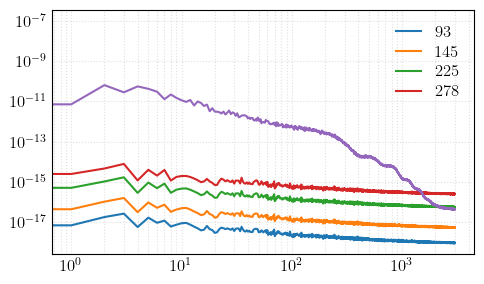

In [52]:
ls = np.arange(0, 3000)
fig, ax = plt.subplots(1,1, figsize = (5,3))
plt.plot(ls, S4_CIB_pspec[ls,0,0], label=r'${:.0f}$'.format(S4_freqs[3+0]))
plt.plot(ls, S4_CIB_pspec[ls,1,1], label=r'${:.0f}$'.format(S4_freqs[3+1]))
plt.plot(ls, S4_CIB_pspec[ls,2,2], label=r'${:.0f}$'.format(S4_freqs[3+2]))
plt.plot(ls, S4_CIB_pspec[ls,3,3], label=r'${:.0f}$'.format(S4_freqs[3+3]))
plt.plot(ls, cmb_autospectra[0][ls])
beautify(ax)
plt.yscale('log')
plt.xscale('log')
plt.tight_layout()
plt.show()

### Combine Foregrounds with CIB

In [53]:
if compute_full_s4_fg:
    full_S4_TT, full_S4_EE, full_S4_BB = [np.zeros((np.shape(S4_pspec_TT_fg)))] * 3

    for li in range(ellTot):
        full_S4_TT[li]       = S4_pspec_TT_fg[li]
        full_S4_TT[li,3:,3:]+= S4_CIB_pspec[li]

        # assume 1% is polarized
        full_S4_EE[li]       = S4_pspec_EE_fg[li]
        full_S4_EE[li,3:,3:]+= S4_CIB_pspec[li]/100.

        full_S4_BB[li]       = S4_pspec_BB_fg[li]
        full_S4_BB[li,3:,3:]+= S4_CIB_pspec[li]/100.

    np.save(path_dir+'full_S4_foregrounds_TT.npy', full_S4_TT)
    np.save(path_dir+'full_S4_foregrounds_EE.npy', full_S4_EE)
    np.save(path_dir+'full_S4_foregrounds_BB.npy', full_S4_BB)


### Check

In [105]:
allcols = ['#377eb8', '#ff7f00', 'forestgreen', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']

def noise(ellMax, nfreqs, experiment):
    # Instrumental noise: takes parameters Beam FWHM and Experiment sensitivity in T
    ''' Output format: (spectrum type, ells, channels)'''

    beamFWHM = experiment['FWHMrad']**2.
    beamFWHM = beamFWHM[:nfreqs]
    deltaT   = experiment['SensitivityμK']**2.
    deltaT   = deltaT[:nfreqs]
    lknee    = experiment['Knee ell']
    aknee    = experiment['Exponent']

    ells = np.arange(2, ellMax)
    rednoise = ((ells/lknee)**aknee if (lknee!=0. and aknee!=0.) else 0.)
    ellexpo  = ells * (ells + 1.) / (8. * np.log(2))

    NellTT = np.zeros((ellMax, nfreqs, nfreqs))
    Beams  = np.zeros((ellMax, nfreqs))
    for frq in range(nfreqs):
        NellTT[2:,frq,frq]= deltaT[frq] * ( 1. + rednoise )
        Beams[2:,frq] = np.exp(-ellexpo * beamFWHM[frq])

    Beams2D  = (Beams[:,None,:] * Beams[:,:,None])**0.5
    return NellTT, np.sqrt(2)*NellTT, np.sqrt(2)*NellTT, Beams2D


arcmin2rad = lambda arcm: arcm/60. * np.pi/180.
ghztoev    = lambda GHz: 4.13566553853809E-06 * GHz

Planck = {'freqsGHz'     :            np.array([30,     44,   70,     100,  143, 217,  353,  545,  857  ]) ,\
          'freqseV'      :    ghztoev(np.array([30,     44,   70,     100,  143, 217,  353,  545,  857  ])),\
          'FWHMarcmin'   :            np.array([32.408, 27.1, 13.315, 9.69, 7.3, 5.02, 4.94, 4.83, 4.64 ]) ,\
          'FWHMrad'      : arcmin2rad(np.array([32.408, 27.1, 13.315, 9.69, 7.3, 5.02, 4.94, 4.83, 4.64 ])),\
          'SensitivityμK':            np.array([195.1, 226.1, 199.1, 77.4, 33., 46.8, 153.6, 818.2, 40090.7])*arcmin2rad(1.),\
          'Knee ell'     : 0.,\
          'Exponent'     : 0.}

CMBS4 = {'freqsGHz'  :            np.array([20,    27,   39,   93,   145,  225,  278 ]) ,\
         'freqseV'   :    ghztoev(np.array([20,    27,   39,   93,   145,  225,  278 ])),\
         'FWHMarcmin':            np.array([11.0,  8.4,  5.8,  2.5,  1.6,  1.1,  1.0 ]) ,\
         'FWHMrad'   : arcmin2rad(np.array([11.0,  8.4,  5.8,  2.5,  1.6,  1.1,  1.0 ])),\
         'SensitivityμK':         np.array([10.41, 5.14, 3.28, 0.50, 0.46, 1.45, 3.43])*arcmin2rad(1.) ,\
         'Knee ell'  : 100.,\
         'Exponent'  : -3.}

if True:
    # Gaussian beams for Planck channels (as quoted in our dark photon paper)
    Bl30  = hp.sphtfunc.gauss_beam(0.0094247, lmax=ellTot-1, pol=False)
    Bl44  = hp.sphtfunc.gauss_beam(0.0078830, lmax=ellTot-1, pol=False)
    Bl70  = hp.sphtfunc.gauss_beam(0.0038746, lmax=ellTot-1, pol=False)
    Bl100 = hp.sphtfunc.gauss_beam(0.0028187, lmax=ellTot-1, pol=False)
    Bl143 = hp.sphtfunc.gauss_beam(0.0021234, lmax=ellTot-1, pol=False)
    Bl217 = hp.sphtfunc.gauss_beam(0.0014602, lmax=ellTot-1, pol=False)
    Bl353 = hp.sphtfunc.gauss_beam(0.0014369, lmax=ellTot-1, pol=False)
    Bl545 = hp.sphtfunc.gauss_beam(0.0014049, lmax=ellTot-1, pol=False)
    Bl857 = hp.sphtfunc.gauss_beam(0.0013497, lmax=ellTot-1, pol=False)
    Beams0P = [Bl30, Bl44, Bl70, Bl100, Bl143, Bl217, Bl353, Bl545, Bl857]

    # S4 beams
    Bl20  = hp.sphtfunc.gauss_beam(0.003199768, lmax=ellTot-1, pol=False)
    Bl27  = hp.sphtfunc.gauss_beam(0.002443459, lmax=ellTot-1, pol=False)
    Bl39  = hp.sphtfunc.gauss_beam(0.001687150, lmax=ellTot-1, pol=False)
    Bl93  = hp.sphtfunc.gauss_beam(0.000727221, lmax=ellTot-1, pol=False)
    Bl145 = hp.sphtfunc.gauss_beam(0.000465421, lmax=ellTot-1, pol=False)
    Bl225 = hp.sphtfunc.gauss_beam(0.000319977, lmax=ellTot-1, pol=False)
    Bl278 = hp.sphtfunc.gauss_beam(0.000290888, lmax=ellTot-1, pol=False)
    Beams0S = [Bl20, Bl27, Bl39, Bl93, Bl145, Bl225, Bl278]


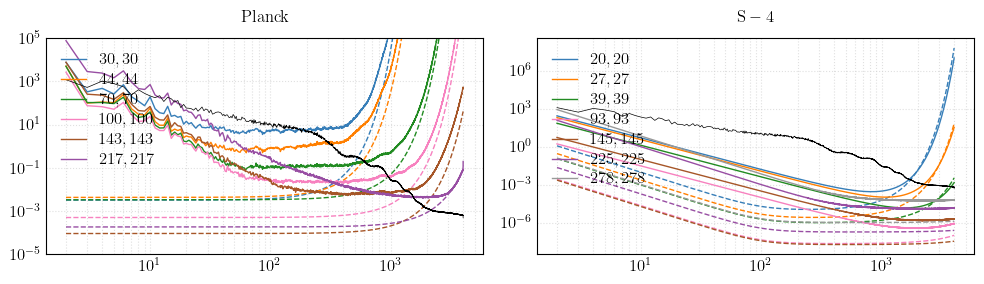

In [106]:
if True:
    off1 = 0
    fs4 = len(full_S4_TT[0])
    fpl = len(full_Planck_TT[0][:-3])
    diag_S41     = np.array([full_S4_TT[:,fi,np.mod(fi+off1,fs4)] for fi in range(fs4)])
    diag_Planck1 = np.array([full_Planck_TT[:,fi,np.mod(fi+off1,fpl)] for fi in range(fpl)])

    pref = tcmb**2. / fsky

    ellMax = 4000
    ls = np.arange(2, ellMax)
    NellTT_Planck, NellEE_Planck, NellBB_Planck, Beams_Planck = noise(ellMax, 7, Planck)
    NellTT_S4, NellEE_S4, NellBB_S4, Beams_S4 = noise(ellMax, 7, CMBS4)

    fig, ax = plt.subplots(1,2, figsize = (10,3.))
    colsdef = cycle(allcols)
    for fi in range(fpl):
        col = next(colsdef)
        ax[0].plot(ls, pref * diag_Planck1[fi,ls]/(Beams0P[fi][ls]**2.), color=col, lw=1, label=r'${:.0f}, {:.0f}$'.format(Planck_freqs[fi], Planck_freqs[np.mod(fi+off1,fpl)]))
        ax[0].plot(ls, NellTT_Planck[ls,fi,fi]/Beams_Planck[ls,fi,fi], color=col, lw=1, ls='--')

    colsdef = cycle(allcols)
    for fi in range(fs4):
        col = next(colsdef)
        ax[1].plot(ls, pref * diag_S41[fi,ls]/(Beams0S[fi][ls]**2.), color=col, lw=1, label=r'${:.0f}, {:.0f}$'.format(S4_freqs[fi], S4_freqs[np.mod(fi+off1,fs4)]))
        ax[1].plot(ls, NellTT_S4[ls,fi,fi]/Beams_S4[ls,fi,fi], color=col, lw=1, ls='--')

    ax[0].set_ylim((1e-5,1e5))
    for ai, aa in enumerate(ax):
        lscmb = np.arange(2, min(6100, ellMax))
        aa.plot(lscmb, pref * cmb_autospectra[0][lscmb], color='k', lw=0.5, ls='-')
        aa.set_xscale('log')
        aa.set_yscale('log')
        aa.set_title([r'$\rm Planck$',r'${\rm S}-4$'][ai])
    beautify(ax)
    plt.tight_layout()
    plt.savefig('./plots/noise_model.pdf')
    plt.show()

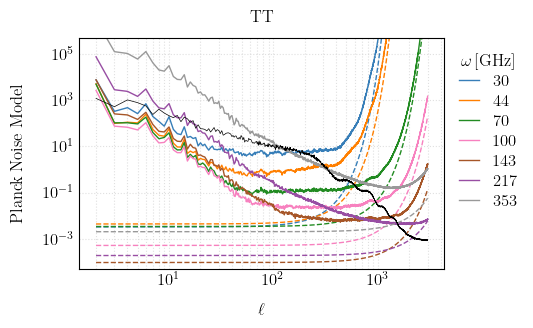

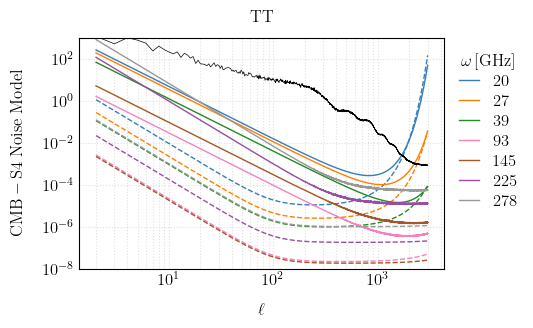

In [127]:
if True:
    pref = tcmb**2. / fsky
    ellMax = 3000
    ls = np.arange(2, ellMax)
    
    fpl = len(full_Planck_TT[0][:7])
    diag_Planck1 = np.array([full_Planck_TT[:,fi,fi] for fi in range(fpl)])

    NellTT_Planck, NellEE_Planck, NellBB_Planck, Beams_Planck = noise(ellMax, 7, Planck)

    fig, ax = plt.subplots(1,1, figsize = (5.6,3.5))
    colsdef = cycle(allcols)
    for fi in range(fpl):
        col = next(colsdef)
        ax.plot(ls, pref * diag_Planck1[fi,ls]/(Beams0P[fi][ls]**2.), color=col, lw=1, label=r'${:.0f}$'.format(Planck_freqs[fi]))
        ax.plot(ls, NellTT_Planck[ls,fi,fi]/Beams_Planck[ls,fi,fi], color=col, lw=1, ls='--')

    ax.set_ylim((5e-5,5e5))
    lscmb = np.arange(2, min(6100, ellMax))
    ax.loglog(lscmb, pref * cmb_autospectra[0][lscmb], color='k', lw=0.5, ls='-')
    ax.set_title(r'$\rm Planck$')
    ax.set_ylabel(r'$\rm Planck \; Noise \; Model$')
    ax.set_xlabel(r'$\ell$')
    beautify(ax)
    ax.legend(fontsize=12, ncol=1, title=r'$\omega \, [{\rm GHz}]$', bbox_to_anchor=(1,1), frameon=False, handlelength=1.2, labelspacing=0.3, columnspacing=1)
    ax.set_title(r'$\rm TT$')
    plt.tight_layout()
    plt.savefig('./plots/noise_modelPlanck.pdf')
    plt.show()


    fs4 = len(full_S4_TT[0])
    diag_S41 = np.array([full_S4_TT[:,fi,fi] for fi in range(fs4)])
    NellTT_S4, NellEE_S4, NellBB_S4, Beams_S4 = noise(ellMax, 7, CMBS4)

    fig, ax = plt.subplots(1,1, figsize = (5.6,3.5))
    colsdef = cycle(allcols)
    for fi in range(fs4):
        col = next(colsdef)
        ax.plot(ls, pref * diag_S41[fi,ls]/(Beams0S[fi][ls]**2.), color=col, lw=1, label=r'${:.0f}$'.format(S4_freqs[fi]))
        ax.plot(ls, NellTT_S4[ls,fi,fi]/Beams_S4[ls,fi,fi], color=col, lw=1, ls='--')

    ax.set_ylim(1e-8,1e3)
    lscmb = np.arange(2, min(6100, ellMax))
    ax.loglog(lscmb, pref * cmb_autospectra[0][lscmb], color='k', lw=0.5, ls='-')
    ax.set_title(r'${\rm S}-4$')

    ax.set_ylabel(r'$\rm CMB-S4 \; Noise \; Model$')
    ax.set_xlabel(r'$\ell$')
    beautify(ax)
    ax.legend(fontsize=12, ncol=1, title=r'$\omega \, [{\rm GHz}]$', bbox_to_anchor=(1,1), frameon=False, handlelength=1.2, labelspacing=0.3, columnspacing=1)
    ax.set_title(r'$\rm TT$')
    plt.tight_layout()
    plt.savefig('./plots/noise_modelS4.pdf')
    plt.show()

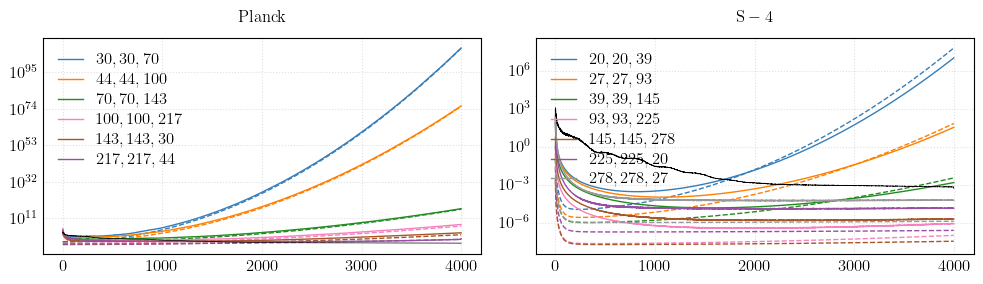

In [56]:
if True:
    off1 = 0
    off2 = 2
    fs4 = len(full_S4_TT[0])
    fpl = len(full_Planck_TT[0][:-3])
    diag_S41     = np.array([full_S4_TT[:,fi,np.mod(fi+off1,fs4)] for fi in range(fs4)])
    diag_S42     = np.array([full_S4_TT[:,fi,np.mod(fi+off2,fs4)] for fi in range(fs4)])
    diag_Planck1 = np.array([full_Planck_TT[:,fi,np.mod(fi+off1,fpl)] for fi in range(fpl)])
    diag_Planck2 = np.array([full_Planck_TT[:,fi,np.mod(fi+off2,fpl)] for fi in range(fpl)])

    ellMax = 4000
    ls = np.arange(2, ellMax)

    fig, ax = plt.subplots(1,2, figsize = (10,3.))
    colsdef = cycle(allcols)
    for fi in range(fpl):
        col = next(colsdef)
        ax[0].plot(ls, pref * diag_Planck1[fi,ls]/(Beams0P[fi][ls]**2.), color=col, lw=1, label=r'${:.0f}, {:.0f}, {:.0f}$'.format(Planck_freqs[fi], Planck_freqs[np.mod(fi+off1,fpl)], Planck_freqs[np.mod(fi+off2,fpl)]))

#        ax[0].plot(ls, pref * diag_Planck2[fi,ls]/(Beams0P[fi][ls]**2.), color=col, lw=1, ls=':')

        ax[0].plot(ls, NellTT_Planck[ls,fi,fi]/Beams_Planck[ls,fi,fi], color=col, lw=1, ls='--')

    colsdef = cycle(allcols)
    for fi in range(fs4):
        col = next(colsdef)
        ax[1].plot(ls, pref * diag_S41[fi,ls]/(Beams0S[fi][ls]**2.), color=col, lw=1, label=r'${:.0f}, {:.0f}, {:.0f}$'.format(S4_freqs[fi], S4_freqs[np.mod(fi+off1,fs4)], S4_freqs[np.mod(fi+off2,fs4)]))

#        ax[1].plot(ls, pref * diag_S42[fi,ls]/(Beams0S[fi][ls]**2.), color=col, lw=1, ls=':')

        ax[1].plot(ls, NellTT_S4[ls,fi,fi]/Beams_S4[ls,fi,fi], color=col, lw=1, ls='--')

    for ai, aa in enumerate(ax):
        aa.plot(ls, pref * cmb_autospectra[0][ls], color='k', lw=0.5, ls='-')
        #aa.set_xscale('log')
        aa.set_yscale('log')
        aa.set_title([r'$\rm Planck$',r'${\rm S}-4$'][ai])
    beautify(ax)
    plt.tight_layout()
    plt.show()


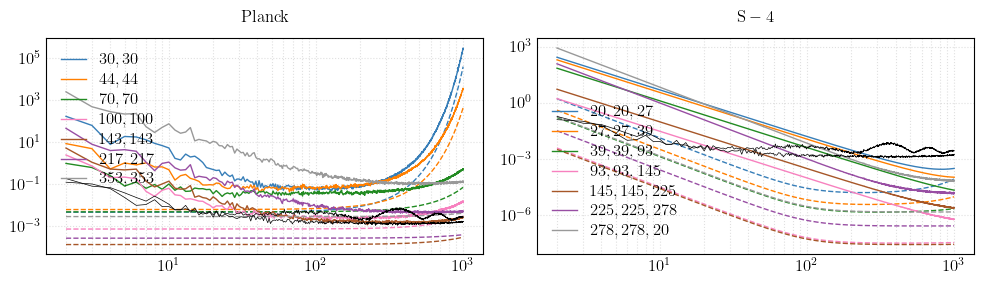

In [57]:
if True:
    off = 0
    off2 = 1
    fs4 = len(full_S4_EE[0])
    fpl = len(full_Planck_EE[0])
    diag_S4e     = np.array([full_S4_EE[:,fi,np.mod(fi+off,fs4)] for fi in range(fs4)])
    diag_S4b     = np.array([full_S4_BB[:,fi,np.mod(fi+off,fs4)] for fi in range(fs4)])
    diag_Plancke = np.array([full_Planck_EE[:,fi,np.mod(fi+off,fpl)] for fi in range(fpl)])
    diag_Planckb = np.array([full_Planck_BB[:,fi,np.mod(fi+off,fpl)] for fi in range(fpl)])

    diag_S4e2     = np.array([full_S4_EE[:,fi,np.mod(fi+off2,fs4)] for fi in range(fs4)])
    diag_S4b2     = np.array([full_S4_BB[:,fi,np.mod(fi+off2,fs4)] for fi in range(fs4)])
    diag_Plancke2 = np.array([full_Planck_EE[:,fi,np.mod(fi+off2,fpl)] for fi in range(fpl)])
    diag_Planckb2 = np.array([full_Planck_BB[:,fi,np.mod(fi+off2,fpl)] for fi in range(fpl)])

    ellMax = 1000
    ls = np.arange(2, ellMax)

    fig, ax = plt.subplots(1,2, figsize = (10,3.))
    colsdef = cycle(allcols)
    for fi in range(fpl):
        col = next(colsdef)
  #      ax[0].plot(ls, pref * diag_Planckb[fi,ls]/(Beams0P[fi][ls]**2.), lw=1, color=col, ls=':')
        ax[0].plot(ls, pref * diag_Plancke[fi,ls]/(Beams0P[fi][ls]**2.), color=col, lw=1, label=r'${:.0f}, {:.0f}$'.format(Planck_freqs[fi], Planck_freqs[np.mod(fi+off,fpl)]))

        ax[0].plot(ls, NellEE_Planck[ls,fi,fi]/Beams_Planck[ls,fi,fi], color=col, lw=1, ls='--')

    colsdef = cycle(allcols)
    for fi in range(fs4):
        col = next(colsdef)
  #      ax[1].plot(ls, pref * diag_S4b[fi,ls]/(Beams0S[fi][ls]**2.), lw=1, color='k', ls=':')
        ax[1].plot(ls, pref * diag_S4e[fi,ls]/(Beams0S[fi][ls]**2.), color=col, lw=1, label=r'${:.0f}, {:.0f}, {:.0f}$'.format(S4_freqs[fi], S4_freqs[np.mod(fi+off,fs4)], S4_freqs[np.mod(fi+off2,fs4)]))

  #      ax[1].plot(ls, pref * diag_S4b2[fi,ls]/(Beams0S[fi][ls]**2.), lw=1, color='k', ls='--', alpha=0.5)
  #      ax[1].plot(ls, pref * diag_S4e2[fi,ls]/(Beams0S[fi][ls]**2.), color=col, lw=1, ls='--', alpha=0.5)

        ax[1].plot(ls, NellEE_S4[ls,fi,fi]/Beams_S4[ls,fi,fi], color=col, lw=1, ls='--')

    for ai, aa in enumerate(ax):
        aa.plot(ls, pref * cmb_autospectra[1][ls], color='k', lw=0.5, ls='-')
        aa.plot(ls, pref * cmb_autospectra[2][ls], color='k', lw=0.5, ls='-')
        aa.set_xscale('log')
        aa.set_yscale('log')
        aa.set_title([r'$\rm Planck$',r'${\rm S}-4$'][ai])
        #aa.set_ylim((-1e-1,1e-1))
    beautify(ax)
    plt.tight_layout()
    plt.show()


In [ ]:
if True:
    off = 0
    off2 = 1
    fs4 = len(full_S4_EE[0])
    fpl = len(full_Planck_EE[0])
    diag_S4e     = np.array([full_S4_EE[:,fi,np.mod(fi+off,fs4)] for fi in range(fs4)])
    diag_S4b     = np.array([full_S4_BB[:,fi,np.mod(fi+off,fs4)] for fi in range(fs4)])
    diag_Plancke = np.array([full_Planck_EE[:,fi,np.mod(fi+off,fpl)] for fi in range(fpl)])
    diag_Planckb = np.array([full_Planck_BB[:,fi,np.mod(fi+off,fpl)] for fi in range(fpl)])

    diag_S4e2     = np.array([full_S4_EE[:,fi,np.mod(fi+off2,fs4)] for fi in range(fs4)])
    diag_S4b2     = np.array([full_S4_BB[:,fi,np.mod(fi+off2,fs4)] for fi in range(fs4)])
    diag_Plancke2 = np.array([full_Planck_EE[:,fi,np.mod(fi+off2,fpl)] for fi in range(fpl)])
    diag_Planckb2 = np.array([full_Planck_BB[:,fi,np.mod(fi+off2,fpl)] for fi in range(fpl)])

    ellMax = 1000
    ls = np.arange(2, ellMax)

    fig, ax = plt.subplots(1,1, figsize = (5,3.5))
    colsdef = cycle(allcols)
    for fi in range(fpl):
        col = next(colsdef)
  #      ax.plot(ls, pref * diag_Planckb[fi,ls]/(Beams0P[fi][ls]**2.), lw=1, color=col, ls=':')
        ax.plot(ls, pref * diag_Plancke[fi,ls]/(Beams0P[fi][ls]**2.), color=col, lw=1, label=r'${:.0f}, {:.0f}$'.format(Planck_freqs[fi], Planck_freqs[np.mod(fi+off,fpl)]))

        ax.plot(ls, NellEE_Planck[ls,fi,fi]/Beams_Planck[ls,fi,fi], color=col, lw=1, ls='--')

    colsdef = cycle(allcols)
    for fi in range(fs4):
        col = next(colsdef)
  #      ax[1].plot(ls, pref * diag_S4b[fi,ls]/(Beams0S[fi][ls]**2.), lw=1, color='k', ls=':')
        ax[1].plot(ls, pref * diag_S4e[fi,ls]/(Beams0S[fi][ls]**2.), color=col, lw=1, label=r'${:.0f}, {:.0f}, {:.0f}$'.format(S4_freqs[fi], S4_freqs[np.mod(fi+off,fs4)], S4_freqs[np.mod(fi+off2,fs4)]))

  #      ax[1].plot(ls, pref * diag_S4b2[fi,ls]/(Beams0S[fi][ls]**2.), lw=1, color='k', ls='--', alpha=0.5)
  #      ax[1].plot(ls, pref * diag_S4e2[fi,ls]/(Beams0S[fi][ls]**2.), color=col, lw=1, ls='--', alpha=0.5)

        ax[1].plot(ls, NellEE_S4[ls,fi,fi]/Beams_S4[ls,fi,fi], color=col, lw=1, ls='--')

    for ai, aa in enumerate(ax):
        aa.plot(ls, pref * cmb_autospectra[1][ls], color='k', lw=0.5, ls='-')
        aa.plot(ls, pref * cmb_autospectra[2][ls], color='k', lw=0.5, ls='-')
        aa.set_xscale('log')
        aa.set_yscale('log')
        aa.set_title([r'$\rm Planck$',r'${\rm S}-4$'][ai])
        #aa.set_ylim((-1e-1,1e-1))
    beautify(ax)
    plt.tight_layout()
    plt.show()


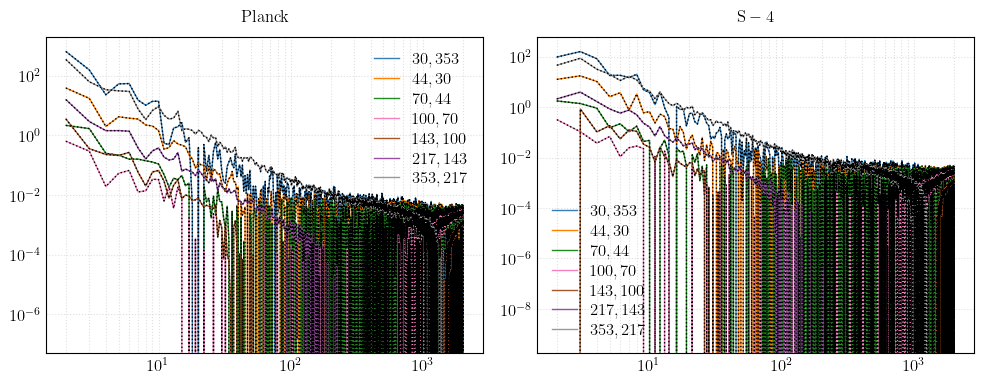

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


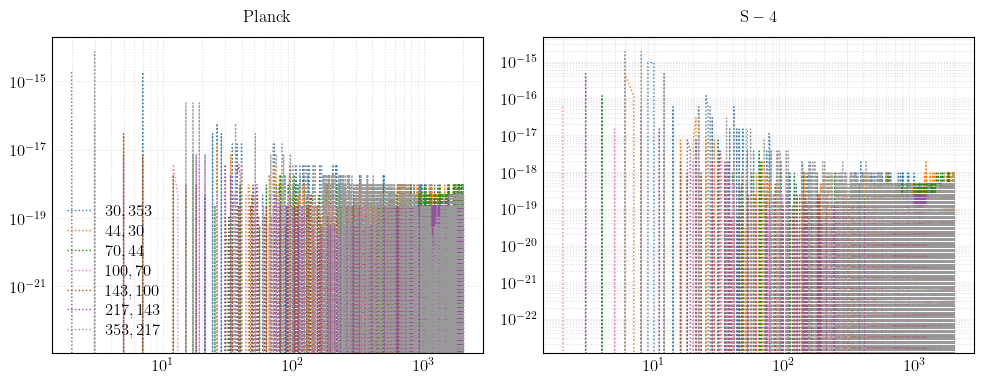

In [58]:
if True:
    off = 6
    fpl = len(full_Planck_EE[0])

    diag_Plancke = np.array([full_Planck_EE[:,fi,np.mod(fi+off,fpl)] for fi in range(fpl)])
    diag_Planckb = np.array([full_Planck_BB[:,fi,np.mod(fi+off,fpl)] for fi in range(fpl)])

    diag_Plancke_2d = np.array([Planck_pspec_EE_fg2d[:,fi,np.mod(fi+off,fpl)] for fi in range(fpl)])
    diag_Planckb_2d = np.array([Planck_pspec_BB_fg2d[:,fi,np.mod(fi+off,fpl)] for fi in range(fpl)])

    ellMax = 2000
    ls = np.arange(2, ellMax)

    fig, ax = plt.subplots(1,2, figsize = (10,4.))
    colsdef = cycle(allcols)
    for fi in range(fpl):
        col = next(colsdef)
        ax[1].plot(ls, pref * diag_Planckb[fi,ls], color=col, ls='-', lw=1, label=r'${:.0f}, {:.0f}$'.format(Planck_freqs[fi], Planck_freqs[np.mod(fi+off,fpl)]))
        ax[1].plot(ls, pref * diag_Planckb_2d[fi,ls], color='k', ls=':', lw=1)
  
        ax[0].plot(ls, pref * diag_Plancke[fi,ls], color=col, lw=1, label=r'${:.0f}, {:.0f}$'.format(Planck_freqs[fi], Planck_freqs[np.mod(fi+off,fpl)]))
        ax[0].plot(ls, pref * diag_Plancke_2d[fi,ls], color='k', ls=':', lw=1)

    for ai, aa in enumerate(ax):
        aa.set_xscale('log')
        aa.set_yscale('log')
        aa.set_title([r'$\rm Planck$',r'${\rm S}-4$'][ai])
        #aa.set_ylim((-1e-1,1e-1))
    beautify(ax)
    plt.tight_layout()
    plt.show()

    fig, ax = plt.subplots(1,2, figsize = (10,4.))
    colsdef = cycle(allcols)
    for fi in range(fpl):
        col = next(colsdef)
        ax[1].plot(ls, pref * (diag_Planckb[fi,ls] - diag_Planckb_2d[fi,ls]), lw=1, color=col, ls=':')
        ax[0].plot(ls, pref * (diag_Plancke[fi,ls] - diag_Plancke_2d[fi,ls]), lw=1, color=col, ls=':', label=r'${:.0f}, {:.0f}$'.format(Planck_freqs[fi], Planck_freqs[np.mod(fi+off,fpl)]))

    for ai, aa in enumerate(ax):
        aa.set_xscale('log')
        aa.set_yscale('log')
        aa.set_title([r'$\rm Planck$',r'${\rm S}-4$'][ai])
        #aa.set_ylim((-1e-1,1e-1))
    beautify(ax)
    plt.tight_layout()
    plt.show()
